# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [1]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [2]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
pip install tweepy==4.12.1

  Using cached tweepy-4.12.1-py3-none-any.whl (101 kB)
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
print (tweepy.__version__)

4.13.0


## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [ ]:
# Collect tweets
#query = "Qatar" + "#MUFC" +  " -filter:retweets" 
#cutoff_date = "2023-03-02" 
searchTerms = "(Qatar AND #MUFC) OR #glazers OR #GlazersSellManUtd OR #QatarIn OR #GlazersOutNow" + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=searchTerms, lang="en", tweet_mode = 'extended' ).items(1500)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)

KeyboardInterrupt: ignored

In [3]:
# Display the dataset
df = pd.read_csv("current_set.csv")
df

,date,user,location,text
0,2023-03-07 13:23:13+00:00,_NextGenBaller,NaN,@ChrisWheelerDM @MailSport It’s clear fatigue ...
1,2023-03-07 13:23:12+00:00,YALOOHD,NaN,When is the Contract getting terminated @ManUt...
2,2023-03-07 13:23:05+00:00,UtdXclusive,"Manchester, England",‼️ - The two days of training for #mufc leadin...
3,2023-03-07 13:22:52+00:00,footballleaguez,"London, England",#LIVMUN Liverpool Manchester United Man United...
4,2023-03-07 13:22:33+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨 The two days of training for Manchester Unit...
...,...,...,...,...
1495,2023-03-07 04:52:10+00:00,Chukwudirim1,"Lagos, Nigeria",Day 16 of tweeting until I get @MarcusRashfor...
1496,2023-03-07 04:45:00+00:00,talkSPORT,United Kingdom,Simon Jordan believes Bruno Fernandes should f...
1497,2023-03-07 04:44:12+00:00,AJForUtd,NaN,Erik Ten Hag got battered on purpose so he can...
1498,2023-03-07 04:40:06+00:00,MUFCSparesHOME,"Manchester, UK ✔","New manager, new team\n\n#MUFC https://t.co/s9..."


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [ ]:
# # Importing essential libraries
# import nltk
# import string
# from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# import re


# # Load the dataset
# tweets_text = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
# tweets_text

# # make a list to store the pre-processed tweets
# tweets_list = []

# # Remove stop words
# sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
# my_stop_words=stopwords.words('english')
# my_stop_words.extend(sw_list)

# for tweets in tweets_text['text']:
#     # Lowercase words
#     tweets = tweets.lower()
#     # Remove punctuation
#     no_punc_text=tweets.translate(str.maketrans('','',string.punctuation))
#     # Remove urls
#     no_url_text=re.sub(r'http\S+', '', no_punc_text)
#     # Tokenisation
#     tknzr = TweetTokenizer(strip_handles=True)
#     tweets_tokens=tknzr.tokenize(no_url_text)
#     no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
#     tweets_tokens_joined=' '.join(no_stop_tokens)
#     tweets_list.append(tweets_tokens_joined)
# print(tweets_list)

In [4]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('current_set.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
#print(tweets_df['text_processed'].head()

# Removing duplicate tweets
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x:re.sub(r"http\S+", "", x))

print(unique_tweets)
#tweets_df

[' mohamed salah has now scored 129 premierleague goals for liverpool in 205 games hes now broken robbie fowlers record to become liverpools alltime top premier league goal scorer mo salahmo salah the egyptian kingfootball mufc lfc nigeria lagos zbassgalcf', ' ref support ceo just like someone doing a ronaldo celebration or a cruyff turn children will mimic what they see on tv were talking about a world class official being pushed in the back here fernandes behaved like an entitled child mufc skysportsnews', 'sheikh jassim watched mufcs 70 loss against liverpool on tv and still wants to buy the club mulive skykaveh', ' ten hag will not allow the tired mufc narrative to take hold in the two training sessions following the late exacting victory over west ham manchester united had lacked zip which was concerning melissareddy_', 'mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn mulive ground_guru', 'centredevils ncus

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

In [9]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-macosx_10_9_x86_64.whl (160 kB)
Note: you may need to restart the kernel to use updated packages.


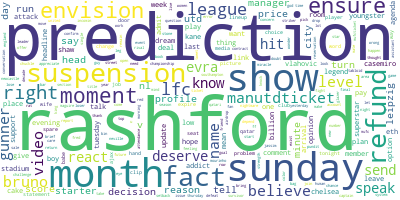

In [5]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Topic Modelling

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# visualise the topics
!pip install pyldavis

In [ ]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [6]:
#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


/Users/al-abed/opt/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_trf' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [7]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


 mohamed salah has now scored 129 premierleague goals for liverpool in 205 games hes now broken robbie fowlers record to become liverpools alltime top premier league goal scorer mo salahmo salah the egyptian kingfootball mufc lfc nigeria lagos zbassgalcf
	NE found:  1 14 PERSON mohamed salah
	NE found:  30 33 CARDINAL 129
	NE found:  34 47 ORG premierleague
	NE found:  58 67 ORG liverpool
	NE found:  71 74 CARDINAL 205
	NE found:  96 110 PERSON robbie fowlers
	NE found:  128 138 ORG liverpools
	NE found:  151 165 ORG premier league
	NE found:  178 194 PERSON mo salahmo salah
	NE found:  199 207 NORP egyptian
	NE found:  230 237 GPE nigeria
 ref support ceo just like someone doing a ronaldo celebration or a cruyff turn children will mimic what they see on tv were talking about a world class official being pushed in the back here fernandes behaved like an entitled child mufc skysportsnews
	NE found:  43 50 PERSON ronaldo
	NE found:  68 74 PERSON cruyff
	NE found:  192 201 GPE fernandes
	

the idea that sheikh jassim bin hamad al thani is not a frontman for the qatar state is preposterousi recently spoke to ncgeehan of human rights group fairsqprojects about the manchester united takeover bid from qatari sheikh jassim mufc h03uvdryw7
	NE found:  21 46 PERSON jassim bin hamad al thani
	NE found:  73 78 NORP qatar
	NE found:  120 128 PERSON ncgeehan
	NE found:  151 165 ORG fairsqprojects
	NE found:  176 193 ORG manchester united
	NE found:  212 218 NORP qatari
	NE found:  226 237 PERSON jassim mufc
to all fellow mufc fans lets not forget the date s8u3xed57h
	NE found:  14 18 ORG mufc
lisandro martinez i try to do my best but you have to work very hard you have to be very clever on the pitch you have to be sharp in every situation because if youre smart you can win the duels discomirror mufc
	NE found:  0 17 PERSON lisandro martinez
	NE found:  194 210 PERSON discomirror mufc
rivals speak more about mufc than they do their own teams on we go zmbo3aesat
	NE found:  24 28 ORG

just in manchester united are interested in signing harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champions league footballmufc mujournalalex_crook
	NE found:  8 18 GPE manchester
	NE found:  19 25 ORG united
	NE found:  52 62 PERSON harry kane
	NE found:  83 94 PERSON daniel levy
	NE found:  108 122 ORG premier league
	NE found:  157 166 GPE tottenham
	NE found:  179 195 ORG champions league
hey gnev2 have you apologised to bruno yet for that wanting to come off comment from sundays game you started this and you can end it with an apology mufc
	NE found:  4 9 PERSON gnev2
	NE found:  33 38 PERSON bruno
	NE found:  85 92 DATE sundays
	NE found:  150 154 PERSON mufc
when i tell you my jaw hit the floor how long has this been happening without us clocking it mufc degea ciuoniide6
i kip reading many things about manchester united i hope erik ten hag and the boys put yall back to shame as hes always done mufc


fulham fans slam ivan toney over disrespectful celebration and for booting sasa lukics face  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba breful
	NE found:  0 6 GPE fulham
	NE found:  17 27 PERSON ivan toney
	NE found:  75 86 PERSON sasa lukics
	NE found:  105 110 ORG bhafc
	NE found:  111 114 ORG cfc
	NE found:  115 119 ORG cpfc
	NE found:  120 123 ORG efc
	NE found:  124 128 ORG lufc
	NE found:  129 133 ORG lcfc
	NE found:  134 137 ORG lfc
	NE found:  151 155 ORG mufc
	NE found:  156 160 ORG nufc
	NE found:  161 169 ORG saintsfc
	NE found:  170 174 ORG thfc
	NE found:  175 179 ORG coys
	NE found:  180 185 ORG whufc
	NE found:  191 195 ORG wwfc
	NE found:  196 200 ORG afcb
	NE found:  201 204 ORG ffc
jude bellingham snubbed man utd transfer talks because they clashed with training mufc 
	NE found:  0 15 PERSON jude bellingham
	NE found:  24 31 ORG man utd
	NE found:  73 86 ORG training mufc
seems like eric ten hag 

day 23 of tweeting until i get a signed shirt by our rolls royce raphaelvarane help me out please _nick manutd mufc ggmu varane f4r7k7o8ix
	NE found:  0 6 DATE day 23
	NE found:  59 78 PERSON royce raphaelvarane
	NE found:  99 110 PERSON nick manutd
i am pretty sure erik ten hag will now prioritize top3 winning both fa cup amp europa league mufc
	NE found:  17 29 PERSON erik ten hag
	NE found:  50 54 ORG top3
	NE found:  68 74 ORG fa cup
one game and media starts spreading negative propaganda against mufc gajtvz3s7h
	NE found:  0 3 CARDINAL one
	NE found:  64 68 ORG mufc
pair available fulham fa h block n3404 fv contact vishalkhosla7 tickets to be transferred via pdf or digital wallet to official club members via their membership only mufc manutdfacevalue
	NE found:  15 21 ORG fulham
	NE found:  167 171 ORG mufc
weghorse touching the this is anfied sign could never be my player lfc mufc weghorst crf64kfcok
	NE found:  0 8 PERSON weghorse
	NE found:  67 70 ORG lfc
	NE found:  71 75 ORG 

 just in erik ten hag has put mohammed kudus on his list of summer targets for man united ten hag signed kudus for ajax in 2020 and has continued to track his progress alex_crook mufc fxeejfku0o
	NE found:  9 13 GPE erik
	NE found:  14 21 PERSON ten hag
	NE found:  30 44 PERSON mohammed kudus
	NE found:  60 66 DATE summer
	NE found:  79 89 ORG man united
	NE found:  90 97 ORG ten hag
	NE found:  105 110 PERSON kudus
	NE found:  115 119 GPE ajax
	NE found:  123 127 DATE 2020
for crying out loud weghorst livmun lfc mufc fluqlbzrg1
 former mufc striker louis saha on bruno fernandesi think he wants to win and thats what i see in him if the players around him are unhappy with his body language and are worried about being criticised by their captain change jobs thats it you have to accept 
	NE found:  8 12 ORG mufc
	NE found:  21 31 PERSON louis saha
	NE found:  35 51 PERSON bruno fernandesi
manutd individually as well as a unit we were poor tactically we were getting found out as game grow 

 there are obvious reasons for harry kane attraction from mufc but my understanding is that ideally united would like a younger dynamic profile there as like victor osimhen melissareddy_ 
	NE found:  31 41 PERSON harry kane
	NE found:  58 62 ORG mufc
	NE found:  100 106 ORG united
	NE found:  165 185 PERSON osimhen melissareddy
tsbreakfast as a man united fan i would like to congratulate liverpool on now only being 3 points behind us in 3rd after there 7 points at weekend oh hang on they got 3 points massive overreaction its a blip in a otherwise very good season ten hag has done wonders mufc
	NE found:  17 27 ORG man united
	NE found:  61 70 ORG liverpool
	NE found:  89 97 QUANTITY 3 points
	NE found:  111 114 ORDINAL 3rd
	NE found:  127 128 CARDINAL 7
	NE found:  139 146 DATE weekend
	NE found:  167 168 CARDINAL 3
	NE found:  240 247 ORG ten hag
	NE found:  265 269 ORG mufc
wow thoughts on this livmun lfc mufc r3wjlcpfbp
	NE found:  21 27 ORG livmun
people with no trophies out here b

utdxclusive weve had about 22 games won under him as a captain then booommmmm a huge loss and the plastic fans and the regular biased pundits feels hes not fit 2 be captain the mentality of our fanbase is low and if we are like this we are not ready to win a title as fans too mufc
	NE found:  21 29 CARDINAL about 22
say a lot about result on sunday mufc pvbylwokbn
	NE found:  26 32 DATE sunday
bjy_2152 i have no doubts at all here well put pal united when we win united when we lose mufc
	NE found:  51 57 ORG united
	NE found:  70 76 ORG united
	NE found:  90 94 ORG mufc
when is a martial actually back mufc really lacking in a centre forward at the moment
bruno fernandes came in for criticism for his anfield showingmufc vg6pi7axlx
	NE found:  0 15 PERSON bruno fernandes
	NE found:  46 53 ORG anfield
3 thoughts as manchester united lose 70 to liverpool mufc premierleague livmun liverpool lfcaynmtzrhte
	NE found:  0 1 CARDINAL 3
	NE found:  14 31 ORG manchester united
	NE found:  37 39 CA

when manchester united get beat there is so much media coverage its ridiculous they highlight everything its too much no other team on the planet let alone england get that level of scrutiny mufc
	NE found:  5 22 ORG manchester united
	NE found:  156 163 GPE england
	NE found:  191 195 ORG mufc
centredevils mailsport stop the agenda stop the hatred if he was good enough when we were winning then im ok with him as captain when we lose mufc manutd
	NE found:  0 22 PERSON centredevils mailsport
	NE found:  142 153 PERSON mufc manutd
 on this day 2007 henrik larsson scored on his final appearance for manutd in a 10 home win against lille what a player he was mufc dr5b4mkc6g
	NE found:  4 17 DATE this day 2007
	NE found:  18 32 PERSON henrik larsson
	NE found:  68 74 ORG manutd
	NE found:  80 82 CARDINAL 10
	NE found:  100 105 GPE lille
the problem was the team and not bruno fernandesman uniteds portuguese midfielder defended following tasteless criticism mufc uxav5oi8xu
	NE found:  33 51 P

report this account manchesterunited mufc football pl mu brunofernandes 7uj7peuyht
	NE found:  20 36 ORG manchesterunited
victor osimhen admits he dreams of playing in the premier league seriea coyg mufc eplft3jpgizey
	NE found:  0 14 PERSON victor osimhen
	NE found:  46 64 ORG the premier league
	NE found:  65 76 ORG seriea coyg
4 day rest to the betis match after that we play 3 games with a 3 day rest between fatigue is a treat if we rest key players against betis will it be enough quality to win mufc euruvbwio8
	NE found:  0 5 DATE 4 day
	NE found:  18 23 ORG betis
	NE found:  49 50 CARDINAL 3
	NE found:  64 69 DATE 3 day
	NE found:  133 138 ORG betis
	NE found:  172 176 ORG mufc
victor osimhen has issued an update on his hopes for the future mufc eo9pvukqz
	NE found:  0 14 PERSON victor osimhen
	NE found:  64 68 ORG mufc
football matches live on tv this week  avfc brentfordfc bhafc cfc chelsea cpfc efc everton lufc lcfc lfc ynwa mancity mufc manutd nufc saintsfc thfc spurs coys whu

	NE found:  180 187 ORG chelsea
	NE found:  191 199 ORG dortmund
	NE found:  200 217 ORG manchester united
good morning my beautiful devils sending out positive vibes to you all i hope everyone has a good day mufc 9mvstcjeih
	NE found:  5 12 TIME morning
manchester united defender has accidentally solved an unlikely headache for erik ten hag mufc 
	NE found:  0 26 ORG manchester united defender
	NE found:  76 93 PERSON erik ten hag mufc
is harry kane the missing link for man unitednew ep out nowmufc coys hkane xdr3mf5usa
	NE found:  3 13 PERSON harry kane
	NE found:  35 51 ORG man unitednew ep
	NE found:  56 63 ORG nowmufc
 i know my players they are good characters they can bounce back and they will do mufc
bruno is the leader he is the main man last few weeks bruno is shit he needs to be soldthis weeksuch double standards from the man united fans he gives his 100 every matchplays full 90mins of the game he needs to be respected will always be my captainbruno mufc
	NE found:  0 5 PERS

ten hag forced his mufc players to sit in silence and listen to liverpool players celebrate their 70 winten hag told his players they were lucky to be returning back to manchester on the team bus and not with the fuming fans who had travelled to watch such a pitiful display
	NE found:  0 7 PERSON ten hag
	NE found:  19 23 ORG mufc
	NE found:  64 73 ORG liverpool
	NE found:  98 100 CARDINAL 70
	NE found:  108 111 PERSON hag
	NE found:  169 179 GPE manchester
marcusrashford lets keep pushingmufc
	NE found:  0 14 PERSON marcusrashford
mufc crisis what crisis liverpool hit manchester united for seven football weekly the guardian ptfwwoib1k
	NE found:  24 33 GPE liverpool
	NE found:  38 55 ORG manchester united
	NE found:  60 65 CARDINAL seven
	NE found:  75 81 DATE weekly
unitedreal betis europa league thursday 2000 gmt old trafford bt sport 1 bt sport ultimatemufc buuuadxyvu
	NE found:  0 16 ORG unitedreal betis
	NE found:  17 30 ORG europa league
	NE found:  31 48 DATE thursday 2000 gmt


day 21 of tweeting and kindly asking until i get a luke shaw signed shirtthe english roberto carlos and englands best centre back lukeshaw23 is my favourite player amp i think it would be unreal to have his signed shirt so lets give this a go manutd _nick mufc mqgdfgr3xw
	NE found:  0 6 DATE day 21
	NE found:  49 60 PERSON a luke shaw
	NE found:  77 84 NORP english
	NE found:  85 99 PERSON roberto carlos
	NE found:  104 112 GPE englands
	NE found:  130 140 PERSON lukeshaw23
watch this and will not regret stunninga christian attacks how dare you leave christianity lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu bethefight tricolor fluminensefc f1
	NE found:  31 50 PERSON stunninga christian
	NE found:  78 94 ORG christianity lfc
	NE found:  107 112 ORG whufc
	NE found:  113 117 ORG mufc
	NE found:  118 122 ORG thfc
 new newcastle are understood to be monitoring harry maguires situation a number of premier league clubs are interested in the mufc captain

efl non league away attendances at the weekend 6th march 2023  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba championship leaguetwo leaguetwo
	NE found:  0 14 ORG efl non league
	NE found:  35 61 DATE the weekend 6th march 2023
	NE found:  63 74 ORG brentfordfc
	NE found:  75 80 ORG bhafc
	NE found:  81 84 ORG cfc
	NE found:  85 89 ORG cpfc
	NE found:  90 93 ORG efc
	NE found:  94 98 ORG lufc
	NE found:  99 103 ORG lcfc
	NE found:  104 107 ORG lfc
	NE found:  113 120 ORG mancity
	NE found:  121 125 ORG mufc
	NE found:  126 130 ORG nufc
	NE found:  131 139 ORG saintsfc
	NE found:  140 144 ORG thfc
	NE found:  145 149 ORG coys
	NE found:  150 155 ORG whufc
	NE found:  156 160 ORG coyi
	NE found:  161 165 ORG wwfc
	NE found:  166 170 ORG afcb
	NE found:  192 211 PERSON leaguetwo leaguetwo
b_fernandes8 man dont let this wave of hatered take over you result and performance were disappointing but remember we still love you

 manutd have lost just 2 games in which bruno fernandes has played in the last 5 months magnifico mufcdata mufc bruno vj2jlcfgva
	NE found:  1 7 ORG manutd
	NE found:  23 24 CARDINAL 2
	NE found:  40 55 PERSON bruno fernandes
	NE found:  70 87 DATE the last 5 months
will casemiro be available to play when manutd against real betis migiethoe8mufc
	NE found:  5 13 PERSON casemiro
	NE found:  40 46 PERSON manutd
what cb would you like mufc to sign
hkjohnzz utdplug for every haaland there is a shevchenko there is no guarantee he will hit the ground running sancho joined mufc at the top of his game but hasnt hit the heights yet
	NE found:  0 16 PERSON hkjohnzz utdplug
	NE found:  27 34 PERSON haaland
	NE found:  46 56 PERSON shevchenko
	NE found:  110 116 PERSON sancho
	NE found:  124 128 PERSON mufc
pair available under 16 southampton h block e333 fv contact am9pp6 tickets to be transferred via pdf or digital wallet to official club members via their membership only mufc manutdfacevalue
	N

good morning united family mufc_family mufc 8pqatgz2jk
	NE found:  13 26 ORG united family
 new mufc are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football alex_crook
	NE found:  5 9 ORG mufc
	NE found:  27 37 PERSON harry kane
	NE found:  58 69 PERSON daniel levy
	NE found:  83 97 ORG premier league
	NE found:  132 137 ORG spurs
	NE found:  150 166 ORG champions league
	NE found:  176 186 PERSON alex_crook
watch this and will not regret stunning  lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu bethefight tricolor fluminensefc f1 ffc
	NE found:  57 62 ORG whufc
	NE found:  63 67 ORG mufc
	NE found:  68 72 ORG thfc
mufcs shot conversion rate compared to other premier league teams this season timessport 0rrhloqhed
	NE found:  0 5 ORG mufcs
	NE found:  45 59 ORG premier league
	NE found:  66 77 DATE this season
	NE found:  78 88 ORG timessport
l

just incase you keyboard warriors out there have forgottenklopp 1st season 51 games 22 wins zero trophies 8th place finish in pleth first season so far 42 games 30 wins 1 trophystill in fa cup uel last 163rd in pltrust the process manutd mufc
	NE found:  49 63 ORG forgottenklopp
	NE found:  64 74 DATE 1st season
	NE found:  75 77 CARDINAL 51
	NE found:  84 86 CARDINAL 22
	NE found:  92 96 CARDINAL zero
	NE found:  106 109 ORDINAL 8th
	NE found:  126 144 DATE pleth first season
	NE found:  152 154 CARDINAL 42
	NE found:  161 163 CARDINAL 30
	NE found:  169 170 CARDINAL 1
	NE found:  186 196 EVENT fa cup uel
3x man utd vs real betis football tickets still available for sale all seated together in n3404 row 26 anyone interested dm me for more details realbetis footballtickets mufc manutdspares europaleague manchesterunited manchesterunitedtickets manchesterunitedvrealbetis g3nvudwv8b
	NE found:  14 24 ORG real betis
	NE found:  90 95 CARDINAL n3404
	NE found:  100 102 CARDINAL 26
	NE foun

this article is a disgrace why are the media ripping bruno apart what is this vendetta about a week ago he was getting so much praise what happened to getting behind the team mufc glazersout iqrbmglinf
	NE found:  53 58 PERSON bruno
	NE found:  93 103 DATE a week ago
	NE found:  175 179 ORG mufc
	NE found:  191 201 PERSON iqrbmglinf
simon jordan has been spot recently from bruno to declan rice and now graham potter bruno n rice youd say unpopular opinion that they aint great footballers u dont build around themon potter its cfc elevating potter not vice versabrilliant chelseafc cfc mufc epl
	NE found:  0 12 PERSON simon jordan
	NE found:  41 46 GPE bruno
	NE found:  50 61 PERSON declan rice
	NE found:  70 83 PERSON graham potter
	NE found:  84 96 PERSON bruno n rice
	NE found:  177 190 PERSON themon potter
	NE found:  195 198 ORG cfc
	NE found:  220 239 ORG vice versabrilliant
	NE found:  250 253 ORG cfc
tenhagway manutd why did ten hag play shaw varane and casemiro when he perfectly k

day 20 of tweeting until i get casemiro manutd signed shirt which i believe i willsuccess as you prepare to demolish real betis and southampton _nick caseesports mufc utcswvgyrb
	NE found:  0 6 DATE day 20
	NE found:  31 46 PERSON casemiro manutd
	NE found:  117 127 PERSON real betis
may the colors of holi fill our lives with joy and the beautiful game of football with excitement happyholi holi2023 pl premierleague lfc mufc efc thfc lufc afc cfc indianfootball jmiqoipr4g
	NE found:  18 22 GPE holi
	NE found:  147 151 ORG thfc
	NE found:  152 156 ORG lufc
nothing this team does will change the 70 demolition or the memes weve endured this week we all had a reality check i seriously hope that was a freakish accident and they can turn that embarrassment into wins i still love this team and trust eth has got this mufc
	NE found:  39 41 CARDINAL 70
	NE found:  79 88 DATE this week
	NE found:  242 245 PERSON eth
centredevils b_fernandes8 hope he knows how much we appreciate this guy i love br

they mufc squad cant give what they do not have first team isnt strong enough to compete at top level reinforcements needed xtxc0pquv4
	NE found:  5 15 ORG mufc squad
manchester united target inter milan defender mufc 
	NE found:  0 17 ORG manchester united
	NE found:  25 36 ORG inter milan
	NE found:  46 50 PERSON mufc
the reaction to the dismal loss against liverpool is understood but going after your own players when tabloids are clearly trying to cause a rift is preposterous stop hounding bruno and the other players mufc
	NE found:  40 49 ORG liverpool
	NE found:  176 181 PERSON bruno
	NE found:  204 208 ORG mufc
 new mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party and have been encouraged by the response ncustisthesun
	NE found:  1 9 ORG new mufc
	NE found:  35 45 PERSON harry kane
	NE found:  46 57 DATE this summer
	NE found:  84 90 ORG united
	NE found:  109 119 ORG kanes camp
	NE found:  13

100 true any united player for that fact mufc xk2modh6yh
	NE found:  0 3 CARDINAL 100
manchester united cannot let sunday dictate the rest of their season mufc 8db768t5wm
	NE found:  0 17 ORG manchester united
	NE found:  29 35 DATE sunday
were back in uel action on thursday mufc jxcp8hd1mm
	NE found:  27 35 DATE thursday
	NE found:  36 40 ORG mufc
that 7 nil still hurtsi want a much better performance on thursday ggmu mufc
	NE found:  5 6 CARDINAL 7
	NE found:  58 66 DATE thursday
 louis saha on bruno fernandes i think he wants to win and thats what i see in him if the players around him are unhappy with his body lanquage and are worried about being criticised by their captain change jobs mufc rerfadfcgl
	NE found:  1 11 PERSON louis saha
	NE found:  15 30 PERSON bruno fernandes
	NE found:  212 216 ORG mufc
real betis star reveals teams secret weapon to cause massive upset at old trafford mufc glazersout sped142btv
	NE found:  5 10 ORG betis
hutchtweeting talksport freak result x3 70 

mohammed kudus added to manchester uniteds list of targets mufc 
	NE found:  0 14 PERSON mohammed kudus
	NE found:  24 42 ORG manchester uniteds
	NE found:  59 63 ORG mufc
knockout real betis and get 12 points for those 4 games should be our target mufc jwyhkiqeo8
	NE found:  28 30 CARDINAL 12
	NE found:  48 49 CARDINAL 4
genuinely still think vlahovic is the best option for us given age cost profile and potential but his injury record is a bit scary for mei understand that he pushed himself during injury for the world cup but still dont want a martial 20mufc eybmdxy8t7
	NE found:  22 30 PERSON vlahovic
	NE found:  191 204 EVENT the world cup
rashford issues defiant message after liverpool thrashing mufc 
	NE found:  0 8 GPE rashford
	NE found:  38 47 GPE liverpool
	NE found:  58 62 ORG mufc
next game uefa europa league manchester united vs real betis balompié up for the cup mufc gloryglorymanunited oldtrafford thursday manutd realbetis_en europaleague kuqx5xwxws
	NE found:  10 28 ORG 

im selling 4 manchester united vs real betis tickets anyone interested should send me a message manchesterunited europaleague manutd manunitedtickets mufcspares mufctickets mufcrealbetisrealmadrid realbetiscelta realbetisrealvalladolid
	NE found:  11 12 CARDINAL 4
	NE found:  13 30 ORG manchester united
	NE found:  39 44 ORG betis
	NE found:  96 112 ORG manchesterunited
	NE found:  113 125 ORG europaleague
	NE found:  126 132 ORG manutd
	NE found:  173 196 ORG mufcrealbetisrealmadrid
	NE found:  197 211 ORG realbetiscelta
	NE found:  212 235 ORG realbetisrealvalladolid
im still hurting from that liverpool hammering on sunday we need to get back to it thursday night cant come soon enough as we need to respondthat defeat start of season away at brentford changed us we went on a great run hopefully we can do same after sunday mufc ztcnwsijx7
	NE found:  27 36 GPE liverpool
	NE found:  50 56 DATE sunday
	NE found:  83 91 DATE thursday
	NE found:  177 186 GPE brentford
	NE found:  252 258 D

 captain harry maguire and injuryplagued anthony martial are two players ten hag is willing to cash in on alex_crook mufc 
	NE found:  9 22 PERSON harry maguire
	NE found:  41 56 PERSON anthony martial
	NE found:  61 64 CARDINAL two
	NE found:  73 80 ORG ten hag
i actually feel worse today by the result than i did on sunday to really get the rivalry you need to have endured their dominance in the 80s and unfortunately i am old enough to have do so mufc
	NE found:  22 27 DATE today
	NE found:  56 62 DATE sunday
	NE found:  133 140 DATE the 80s
	NE found:  189 193 PERSON mufc
one bad result amp so called fans wanna turn there back on the manager and team ten hag has come into the club and gave us so far one trophy in his first season with the club and the seasons still not over were still in the fa cup qf amp europa league last 16 mufc ggmu rgv7aoed94
	NE found:  0 3 CARDINAL one
	NE found:  80 87 PERSON ten hag
	NE found:  130 133 CARDINAL one
	NE found:  148 153 ORDINAL first
	NE found

liked weghorst till now but this is not acceptable what was he doing mufc uz0krlbdbi
	NE found:  6 14 PERSON weghorst
you must not have seen my dalot tweets mufc bpgdfaaxv1
kindly help me in retweeting im having 2x manchester united vs real betis tickets seated together anyone interested should send me a messagemanchesterunited europaleague manutd manunitedtickets mufcspares mufctickets mufc
	NE found:  29 30 ORG i
	NE found:  30 31 ORG m
	NE found:  42 59 ORG manchester united
	NE found:  68 73 ORG betis
united confident they will sign harry kane on this crucial condition report mufc glazersout tvmkp6ah0e
	NE found:  0 6 ORG united
	NE found:  32 42 PERSON harry kane
	NE found:  76 80 ORG mufc
 erik ten hag has put mohammed kudus on his list of summer targets for manchester united ten hag signed kudus for ajax in 2020 and has continued to track his progressalex_crook mufc
	NE found:  1 13 PERSON erik ten hag
	NE found:  22 36 PERSON mohammed kudus
	NE found:  52 58 DATE summer
	NE fou

i never rated weghorst to our fans who have been lauding average player im sure this hurt this is just not okay mufc aaigiftjxv
 mufc have hired southamptons lead data scientist alex kleyn ground_guru 3dsb7uvvwo
	NE found:  1 5 ORG mufc
	NE found:  17 29 ORG southamptons
	NE found:  50 60 PERSON alex kleyn
can it end now guysmufc cant wait for the bounceback razch0fxu4
no ban for bruno mufc manutd glazers out
	NE found:  11 16 GPE bruno
europa league roundof16 preview mufc manutd manchesterunited 53i0c0zsbe
	NE found:  0 13 EVENT europa league
	NE found:  32 36 ORG mufc
	NE found:  37 43 ORG manutd
	NE found:  44 60 ORG manchesterunited
stretfordpaddck well bounce back mufc
	NE found:  0 15 PERSON stretfordpaddck
dont play casemiro n varane thenbench or dont include them in squadwe need casemiro in away gamehe one game away from suspensionaway game are important for usi dont want ddg as gk but i guess eth prefer him mufc manutd 
	NE found:  10 18 PERSON casemiro
	NE found:  21 37 PERSO

mufc others fans are particularly sharp after the liverpool loss because they fear what is happening at united eth will win us the league and with potential new owners we will be such a force they are scared of the future and enjoying their win 
	NE found:  0 4 ORG mufc
	NE found:  50 59 ORG liverpool
	NE found:  104 114 ORG united eth
anthony taylor will referee mufc vs southampton with andre marriner on var
	NE found:  0 14 PERSON anthony taylor
	NE found:  28 32 ORG mufc
	NE found:  53 67 PERSON andre marriner
	NE found:  71 74 ORG var
terminate his contract what the fack he is doing pack his bags and send him to besiktas manutd mufc upvxzqt8su
	NE found:  79 94 PERSON besiktas manutd
when twitter and fans attacked maguire i remember the media came in support of him they talked about mental health and how that attack on maguire was unfair now the same media is attacking bruno based on false claims whats the difference between bruno and maguire mufc
	NE found:  31 38 PERSON maguire
	

the rest of the league season will be used to test players positions systems out i expect eth will rotate many and play his best lineup in the cup games which means hell have a better picture of knowing who he wants in the summer and who gets to stay or leave mufc
	NE found:  90 93 PERSON eth
	NE found:  260 264 ORG mufc
the signing of harry kane has kinda robin van persie vibes mufcblessedutd i2vuiq3p7i
	NE found:  15 25 PERSON harry kane
	NE found:  36 52 PERSON robin van persie
sheikh jassim bin hamad al thani watched mufc lose 70 to liverpool on tv he still wants to buy united skykaveh iuhp2fmk82
	NE found:  7 32 PERSON jassim bin hamad al thani
	NE found:  41 45 ORG mufc
	NE found:  51 53 CARDINAL 70
	NE found:  57 66 GPE liverpool
	NE found:  95 110 ORG united skykaveh
jonnyfx1 everyone supports a club but he has a job to do its that simple yes you should not touch the anfield badge when you are walking out but whos to say he might never get another chance you have to remember ga

bye newcastle and a number of premier league clubs are interested in signing harry maguire 90min_football mufc
	NE found:  4 13 GPE newcastle
	NE found:  30 44 ORG premier league
	NE found:  77 90 PERSON harry maguire
bruno fernandes responds to claims he asked to be substituted in man utds humiliation mufc manutd gm6knkokzf
	NE found:  0 15 PERSON bruno fernandes
	NE found:  86 90 ORG mufc
tom cleverley i felt like a failure doing it and its a bit of a crazy way to think playing for united and england but at the time i was playing poorly and it was really the start of social media being toxic and i found it hard to deal with to be honest mufc
	NE found:  0 13 PERSON tom cleverley
	NE found:  95 101 ORG united
	NE found:  106 113 GPE england
	NE found:  253 257 ORG mufc
mailsport forget this the only solution is a free transfer away from the club greenwood mufc
	NE found:  0 9 ORG mailsport
	NE found:  78 92 ORG greenwood mufc
however bad manchester united were you cannot just let some

southampton singles amp pairs fulham pairsbetispair amp single all available message me for info mufc mufctickets mufcspare mufc mufctickets
	NE found:  0 11 GPE southampton
	NE found:  30 36 PERSON fulham
no one can tell me otherwise mufc xfw2fozcuv
100 indeedmufc z2vxrag1br
to run a successful hotel it is essential to use an effective hotel mngt system heres why learn more  livmun kevin de bruyne form one fred matiangi revenge kylian mbappe chelsea vs dortmund safaricom cristiano ronaldo sergio ramos
	NE found:  109 124 PERSON kevin de bruyne
	NE found:  170 177 ORG chelsea
	NE found:  181 189 ORG dortmund
	NE found:  210 230 PERSON ronaldo sergio ramos
 i was told that daniel levy would be reluctant to sell harry kane to a pl rival utd are right on the borderline of ffp they might look for someone a bit youngeralex crook reveals hes not convinced by reports that mufc will sign harry kane zbakmfuzxd
	NE found:  17 28 PERSON daniel levy
	NE found:  56 66 PERSON harry kane
	NE found:  

man utds meltdown amp klopp back on top did mufc give up could this derail their season does bruno fernandes deserve so much stickjoin steve_crossman chris_sutton73 rorysmith and robert1green for this weeks monday night club 
	NE found:  4 8 ORG utds
	NE found:  18 27 PERSON amp klopp
	NE found:  44 48 ORG mufc
	NE found:  93 108 PERSON bruno fernandes
	NE found:  165 174 PERSON rorysmith
	NE found:  179 191 PERSON robert1green
	NE found:  201 206 DATE weeks
	NE found:  207 219 EVENT monday night
statmandave yup bruno fernandes was such an outstanding captain for mufc at anfield he was exemplary diving feigning injury whingeing pushing the assistant referee a top display of the manunited way in adversity 
	NE found:  16 31 PERSON bruno fernandes
	NE found:  68 72 ORG mufc
we need osimhen mufc
what is your opinion is bruno fernandes not deserving of being a captain 8aduh9ndudmufc
	NE found:  24 39 PERSON bruno fernandes
bruno fernandes will always be my captain media and haters can keep

so in all likelihood bruno fernandes will not be made the permanent mufc captain will he be sold in the summer if the club goes for de jong bellingham and kane they can recoup a significant chunk of that expense by selling bruno mctominay fred and martial livmun 637hnky0ny
	NE found:  21 36 PERSON bruno fernandes
	NE found:  68 72 ORG mufc
	NE found:  100 110 DATE the summer
	NE found:  132 150 PERSON de jong bellingham
	NE found:  155 159 PERSON kane
	NE found:  223 243 PERSON bruno mctominay fred
	NE found:  248 262 PERSON martial livmun
hey redim selling my 2x manchester united ticket for the home game manchester united vs real betisat old traffordthurs 09 mar 2000kindly dm me if youre interestedmanchesterunited manutd mufc manchesterunitedticket manutdticket mufcticket europaleague realbetis
	NE found:  24 41 ORG manchester united
	NE found:  67 84 ORG manchester united
	NE found:  105 125 DATE traffordthurs 09 mar
	NE found:  191 213 ORG manchesterunitedticket
	NE found:  214 226 

we know now how big and influential manchester united is everyone is trying to make the headline with the club name and players just to chase cloutswe keep moving irrespective ggmu mufc
	NE found:  36 53 ORG manchester united
	NE found:  142 150 ORG cloutswe
	NE found:  176 180 ORG ggmu
	NE found:  181 185 ORG mufc
ive never seen a reaction like this ever after a team losing like this mufc
	NE found:  71 75 ORG mufc
i couldnt agree more i would spend the money on victor osimhen higher ceiling price young pace a decent finisher and pretty raw mufc tqajbl9ot5
	NE found:  48 62 PERSON victor osimhen
	NE found:  128 132 ORG mufc
osimhen all the way 6 years young and the same price roughly id take him kanes only trajectory is down victor is going up mufc sphsfgnbr9
	NE found:  0 7 PERSON osimhen
	NE found:  20 33 DATE 6 years young
	NE found:  73 78 PERSON kanes
	NE found:  103 109 PERSON victor
manchester united fans name ideal next captain after bruno fernandes criticismmufc vg6pi7apvz
	N

man united are keen to sign kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football alex_crook mufc
	NE found:  0 10 ORG man united
	NE found:  28 32 PERSON kane
	NE found:  53 64 PERSON daniel levy
	NE found:  78 92 ORG premier league
	NE found:  127 132 ORG spurs
	NE found:  145 161 ORG champions league
	NE found:  171 186 PERSON alex_crook mufc
that doesnt look good ngl mufc aamzxxqxv6
1 bad result aint changing my stance on the manutd team we are progressing games like this happen thats football move on aint got time to be in past were going high under ten hag let the man cook victories are sweeter when there are bad games mufc bald is best
	NE found:  0 1 CARDINAL 1
	NE found:  44 50 ORG manutd
	NE found:  187 190 ORG man
	NE found:  243 247 ORG mufc
	NE found:  248 252 PERSON bald
2x man united v betis tickets available for sale dm for more details mufc mufc manchesterunited manunited mufc_fami

the question is who is the worst mufc manchesterunited captain ever 00u0rf69bm
	NE found:  33 37 ORG mufc
	NE found:  38 54 ORG manchesterunited
 ten hags message to the mufc players after the 70 loss to liverpool was what happened doesnt destroy all the good work we have done this season he told them to be hungry to put things right and the importance of not being depressed or losing confidence
	NE found:  1 9 PERSON ten hags
	NE found:  25 29 ORG mufc
	NE found:  48 50 CARDINAL 70
	NE found:  59 68 ORG liverpool
	NE found:  133 144 DATE this season
why the fook is weghorst touching the liverpool badgeno wonder we lost 70 mufc pxxt9a5hkt
	NE found:  16 24 PERSON weghorst
	NE found:  38 47 GPE liverpool
	NE found:  48 55 GPE badgeno
	NE found:  71 73 CARDINAL 70
2x man united ticket available southampton dm for more detailsmufctransfer mufc mufctickets mufcspares tickets mufc mufc_family unitedtickets manunited tickets manutickets ticket transfer spare spares
	NE found:  31 42 GPE sout

will be selling 1 spare ticket fa cup quarter final vs fulham east stand lower section e237 must a member for ticket forwarding 35 mufc mufc_family manutdfacevalue
	NE found:  16 17 CARDINAL 1
	NE found:  31 37 EVENT fa cup
	NE found:  55 72 FAC fulham east stand
was just thinking about this would you rather your club win the carabao cup or beat your arch rivals 70 the biggest loss in their historyfpl fplcommunity epl livmun liverpool manunited football lfc premierleague mufc soccer livrma uclfantasy ucl
	NE found:  60 75 EVENT the carabao cup
	NE found:  101 103 CARDINAL 70
bruno fernandes should not captain manchester united again following sundays humiliating 70 defeat by liverpool says chris suttonmufc brunofernandes i9rizlkl64
	NE found:  0 15 PERSON bruno fernandes
	NE found:  35 52 ORG manchester united
	NE found:  69 76 DATE sundays
	NE found:  89 91 CARDINAL 70
	NE found:  102 111 ORG liverpool
	NE found:  117 133 PERSON chris suttonmufc
	NE found:  134 148 PERSON brunofernand

otd in 1995 steve bruce scores the winning goal as mufc overcome wimbledon6wgansdoyu
	NE found:  7 11 DATE 1995
	NE found:  12 23 PERSON steve bruce
	NE found:  51 55 ORG mufc
	NE found:  65 84 EVENT wimbledon6wgansdoyu
 sheikh jassim bin hamad al thani watched manchester united lose 70 to liverpool on tv he still wants to buy united skykaveh mufc
	NE found:  8 33 PERSON jassim bin hamad al thani
	NE found:  42 59 ORG manchester united
	NE found:  65 67 CARDINAL 70
	NE found:  71 80 GPE liverpool
	NE found:  109 129 ORG united skykaveh mufc
is it thursday yet bring on betis mufc mitrsviw6p
	NE found:  6 14 DATE thursday
bruno fernandes anfield antics look set to end his dream of becoming fulltime manchester united captaintenhagout ucl usa uk mufctakeover mufc transfernews wbvexaabjk
	NE found:  0 23 PERSON bruno fernandes anfield
	NE found:  78 95 ORG manchester united
heres the brighter side you are beaten 10 you lose 3 points you are beaten 70 equivalent to loosing 2 games you still 

rr loanwatch fixtures19 45 barnsley vs portsmouth bernardgrimsby vs newport mcneillscunthorpe vs altrincham oyedelemufc
	NE found:  24 26 CARDINAL 45
	NE found:  27 35 GPE barnsley
	NE found:  39 64 ORG portsmouth bernardgrimsby
	NE found:  68 93 ORG newport mcneillscunthorpe
	NE found:  97 119 ORG altrincham oyedelemufc
qatari royalsjassim bin jaber al thani want to complete the deal for mufc by the end of april glazers want the auction to last until the summer as they are waiting for other offers from other bidders sheikh jassim have over 1000 people engaged in the mufctakeover tcqkwbkz7h
	NE found:  0 6 NORP qatari
	NE found:  7 38 PERSON royalsjassim bin jaber al thani
	NE found:  69 73 ORG mufc
	NE found:  77 93 DATE the end of april
	NE found:  133 143 DATE the summer
	NE found:  200 213 PERSON sheikh jassim
	NE found:  219 228 CARDINAL over 1000
 morning reds reread the quote you will never reach your destination if you stop and throw stones at every dog that barkstheres always 

a tweet a day until our football club is no longer a glazer cash cowday 879fullsaleonly weareunited you were never welcome take the money amp leaveglazersoutglazerssellmanutdmufc
	NE found:  53 59 ORG glazer
	NE found:  88 99 ORG weareunited
	NE found:  138 141 ORG amp
	NE found:  142 178 ORG leaveglazersoutglazerssellmanutdmufc
football__tweet game was lost before we even stepped onto the pitch mufc
marcford10mr now_arsenai many at mufc players were irritated by bruno fernandes behaviour on the pitch against liverpoolinstead of bruno fernandesthere is a feeling at mufc that raphaël varanedavid de gea or casemiro would be better suited to the role as club captain
	NE found:  13 24 PERSON now_arsenai
	NE found:  33 37 ORG mufc
	NE found:  64 79 PERSON bruno fernandes
	NE found:  131 151 PERSON bruno fernandesthere
	NE found:  168 172 ORG mufc
	NE found:  178 204 PERSON raphaël varanedavid de gea
	NE found:  208 216 PERSON casemiro
deadlinedaylive speakin on the behalf of eth like he fuc

touchlinefracas tlf_muga that was our best season with ole mufc fwqeao8goj
	NE found:  55 63 ORG ole mufc
 alejandro garnacho via twitter we are so sorry we will give you a reaction on thursday reds mufc 7ev8x2dy78
	NE found:  1 19 PERSON alejandro garnacho
	NE found:  79 87 DATE thursday
	NE found:  93 97 ORG mufc
chin up reds trust the process were on the right track manutd mufc
mufc him and rashford gonna go crazyyyyy ckaqfxkgmx
	NE found:  13 21 PERSON rashford
 mufcs shot conversion rate compared to other premier league teams this season timessport pfcpcvs4fl
	NE found:  1 6 ORG mufcs
	NE found:  46 60 ORG premier league
	NE found:  67 78 DATE this season
	NE found:  79 89 ORG timessport
man utd plot massive offer to sign 120000 a week player report mufc manutd manchesterunited kbtcfikseh
	NE found:  4 7 ORG utd
	NE found:  35 41 CARDINAL 120000
	NE found:  63 67 ORG mufc
	NE found:  68 74 ORG manutd
	NE found:  75 91 ORG manchesterunited
fuck this anti bruno shit im seeing all ov

the heavy loss for manutd was hard to digest now that i am calm i want to advise the red army to stand behind our manager amp players when we lose before we win trust the process because we started seeing the end of the dark tunnel mufc manchester_united glazerout
	NE found:  19 25 ORG manutd
	NE found:  81 93 ORG the red army
	NE found:  122 133 PERSON amp players
	NE found:  232 236 ORG mufc
bruno fernandes is really appreciated by his mufc teammates and has a fantastic relationship with many of them there is no problem there ten hag really appreciates him too source fabrizioromano
	NE found:  0 15 PERSON bruno fernandes
	NE found:  45 49 ORG mufc
	NE found:  137 144 PERSON ten hag
	NE found:  179 193 PERSON fabrizioromano
just when it looked like it couldnt get any worse for mufc it did cvfuz6r1w
this thing is concerning but he is learning in job as well reality check for our manager amp lesson to be learned for big players amp tactically weve been a bit awful lately i fully trust e

 louis saha on bruno fernandes i think he wants to win and thats what i see in him if the players around him are unhappy with his body lanquage and are worried about being criticised by their captain change jobs mufc rbejnogqtw
	NE found:  1 11 PERSON louis saha
	NE found:  15 30 PERSON bruno fernandes
	NE found:  212 216 ORG mufc
 new via fabrizioromanobruno fernandes is really appreciated by his teammates and has a fantastic relationship with many of them there is no problem there and ten hag really appreciates him toomufc manutd
	NE found:  9 38 PERSON fabrizioromanobruno fernandes
	NE found:  159 166 ORG ten hag
	NE found:  190 204 ORG toomufc manutd
hated adored never ignored mufc rljanfhbes
wdfim speechlessinsert your caption heremufc d9hy7gy6zy
skysportspl we need the nigerian king for the sake of god please erik please mufc gyebx4rgz2
	NE found:  24 32 NORP nigerian
our captain ladies and gentlemen how can you still want him to wear the armband mufc glazersout brunoout cb3bgekk

manutdinpidgin cant believe what im seeing mufc
	NE found:  0 14 PERSON manutdinpidgin
	NE found:  43 47 PERSON mufc
sir alex ferguson has told erik ten hag what he must expect next mufc manchesterunited 3jbcfd0pts
	NE found:  4 17 PERSON alex ferguson
	NE found:  27 39 PERSON erik ten hag
	NE found:  65 69 ORG mufc
	NE found:  70 86 ORG manchesterunited
man united vs real betistickets theresingles pairs trios and quadsdm this account as manunitedplug10 has been taken down mufc munrealbetis europaleague mufctickets mufc_family oldtrafford eriktenhag manutd mufcspares eth manchesterunited marcusrashford europa
	NE found:  0 10 ORG man united
	NE found:  61 68 ORG quadsdm
	NE found:  85 100 ORG manunitedplug10
	NE found:  121 125 ORG mufc
welsh international striker graham moore was born in cascade near hengoed glamorgan on this day in 1941 he played for wales on 21 occasions but scored just once graham passed away 9th february 2016 mufc utfr ggmu mancheaterunited uxfxhnluyd
	NE found:  

privilege_mufc instead of accepting defeat they some of them just have to have agendas against certain players bruno is always the scapegoat today weghorst i am sure there are plenty of players who supported other clubs and played for other clubs take wayne rooney lol everton mufc
	NE found:  111 116 PERSON bruno
	NE found:  141 146 DATE today
	NE found:  147 155 PERSON weghorst
	NE found:  252 264 PERSON wayne rooney
	NE found:  269 281 PERSON everton mufc
trying to use man utd to get suitors for him veronica rabiot we know your game ma mufc gbetqxqbbi
	NE found:  45 60 PERSON veronica rabiot
sheikh jassim bin hamad al thani watched manchester united lose 70 to liverpool on tv he still wants to buy manchester unitedone lose doesnt change capability of the teammufc brunofernandes rashford livmun pl lxmtyjvxea
	NE found:  7 32 PERSON jassim bin hamad al thani
	NE found:  41 58 ORG manchester united
	NE found:  64 66 CARDINAL 70
	NE found:  70 79 ORG liverpool
	NE found:  108 128 ORG man

 mufc could return for adrien rabiot this summer manchester city are also interested the 27yearold will be a free agent in june footyinsider247 ky8tgo38cp
	NE found:  1 5 ORG mufc
	NE found:  23 36 PERSON adrien rabiot
	NE found:  37 48 DATE this summer
	NE found:  49 64 GPE manchester city
	NE found:  89 98 DATE 27yearold
	NE found:  123 127 DATE june
utddistrict cainsmithmu one thing i do need to mention here is its all well and good for ten hag to stick with his philosophy to go all out for attack but sometimes its better to wiseup and adopt a clever pragmatic approach when playing top teams at the away stadiums fergie used to do the same mufc
	NE found:  0 23 FAC utddistrict cainsmithmu
	NE found:  24 27 CARDINAL one
	NE found:  89 96 PERSON ten hag
	NE found:  268 274 ORG fergie
	NE found:  295 299 ORG mufc
why would that put him off mufc kglyplz3oi
1 x single available for real betis europa league 9th march block n1405 6 rows from pitch dm me fv manunitedticks mufc_tickets mufcsp

regardless or what anyone thinks about bruno in terms of the captaincy dressing rooms leaks is a fcking jokei back bruno here no time for he deserves loyalty off his team matesweed em out and fuck em off mufc
	NE found:  39 44 PERSON bruno
	NE found:  115 120 PERSON bruno
interesting mufc jvlvpvnzla
	NE found:  17 27 PERSON jvlvpvnzla
shocking performance manchesterunited manunited manutd mufc liverpoolfc lfc anfield eriktenhag tenhag klopp premierleague tiktok hc7vysow0l
	NE found:  21 37 ORG manchesterunited
	NE found:  38 47 ORG manunited
	NE found:  48 54 ORG manutd
	NE found:  55 59 ORG mufc
	NE found:  60 71 ORG liverpoolfc
	NE found:  72 75 ORG lfc
there have been some suggestions both he and raphael varane were carrying knocks at anfield although this is yet to be verified mu mufc jgffhejsjq
	NE found:  45 59 PERSON raphael varane
manchester united and arsenal are two clubs interested in marco asensio his contract expires this summer and there are no plans to extend it afc mufc

# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [8]:
#!pip install spacy-entity-linker
#!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

/Users/al-abed/opt/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [9]:
from spacy_entity_linker import EntityLinker
#!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

In [10]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass


 mohamed salah has now scored 129 premierleague goals for liverpool in 205 games hes now broken robbie fowlers record to become liverpools alltime top premier league goal scorer mo salahmo salah the egyptian kingfootball mufc lfc nigeria lagos zbassgalcf
https://www.wikidata.org/wiki/Q1354960 mohamed,salah  => Mohamed Salah <Egyptian association football player>
https://www.wikidata.org/wiki/Q4503831 goals  => goal <desired result or outcome>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q178588 record  => gramophone record <disc-shaped vinyl analog sound storage medium>
https://www.wikidata.org/wiki/Q14773 mo  => Macau <Special Administrative Region of China>
https://www.wikidata.org/wiki/Q8673 lagos  => Lagos <city in Nigeria>
 ref support ceo just like someone doing a ronaldo celebration or a cruyff turn child

 update qatar remain in pole position to buy mufc with their 5b bidthey want to keep erik ten hag and help him recruit top players in every position on the field 9gtaxhqi7a
https://www.wikidata.org/wiki/Q846 qatar  => Qatar <constitutional monarchy in western Asia>
https://www.wikidata.org/wiki/Q588596 pole,position  => pole position <first position on a motor-racing starting grid>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q65070777 5b  => 5B <2019 documentary film by Paul Haggis and Dan Krauss>
https://www.wikidata.org/wiki/Q2844569 erik,ten,hag  => Erik ten Hag <Dutch football player>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q11488158 position  => corporate title <job title given to company and organization officials to show what duties

 mufc believe they will land harry kane this summer if tottenham finish outside the top four ncustisthesun 
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q18741 tottenham  => Tottenham Hotspur F.C. <association football club in Tottenham, England>
1 ticket for sale for manchester united vs real betis this thursday at old trafford excellent seat front row of sir alex stand in the 2nd tier see pictures below on my page for the view dm me if interested mufc manchesterunited europaleague realbetis ticketsforsale
https://www.wikidata.org/wiki/Q551800 ticket  => ticket <paper or cardboard document 

there are obvious reasons for harry kane attraction from mufc but my understanding is that ideally united would like a younger dynamic profile there as like victor osimhen melissareddy_
https://www.wikidata.org/wiki/Q178354 reasons  => reason <capacity for consciously making sense of things>
https://www.wikidata.org/wiki/Q4818701 attraction  => attractiveness <quality that causes an interest or desire in something or someone>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q46744 understanding  => understanding <ability to think about and use concepts to deal adequately with an object>
https://www.wikidata.org/wiki/Q5117123 profile  => profile <engineering concept; subset internal to a specification>
https://www.wikidata.org/wiki/Q499197 victor  => Victor <1952 strategic bomber family by Handley Page>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared 

uploading this with the hope of opening a conversation me or anybody coz there is this perception that online fans want coz of success amp money thats untrue amp largely undervaluing us talk to real people pls gnev2 lauriewhitwell ankaman616 wearetheoverlap mufc pdyvjfvuj8
https://www.wikidata.org/wiki/Q190507 hope  => hope <HOPE, Have Only Positive Expections, An Abbrivation by Edwin Nyameyie Cartey>
https://www.wikidata.org/wiki/Q52943 conversation  => conversation <form of interactive communication between or among people>
https://www.wikidata.org/wiki/Q1657347 coz  => Constanza Airport <airport in the Dominican Republic>
https://www.wikidata.org/wiki/Q160402 perception  => perception <organization, identification, and interpretation of sensory information in order to represent and understand the environment>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q1657347 coz  => Constanza Ai

everyone getting their stone island jackets out and putting on their balaclavas to go around weghorst hotel this evening mufc
https://www.wikidata.org/wiki/Q1131660 stone  => stone <informal unit of measure equal to 14 pounds avoirdupois>
https://www.wikidata.org/wiki/Q211003 balaclavas  => balaclava <woollen cap covering the head and neck leaving the face revealed>
https://www.wikidata.org/wiki/Q27686 hotel  => hotel <business enterprise that provides lodging in a single building paid on a short-term basis>
https://www.wikidata.org/wiki/Q7725 evening  => evening <period of the day from 6:00 PM until nighttime>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
marcus rashford stats this season see link in bio for more statsrashford marcusrashford mufc manunited premierleague footballstats ssi tbddtetw5j
https://www.wikidata.org/wiki/Q22951255 marcus,rashford  => Marcus Rashford <English association football player>

seems like eric ten hag wants to sign a 1st team strikerwho do u prefer and why mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
ten hag has also put ajax attacker mohammed kudus who scored twice for ghana at the world cup in qatar on his list of summer targets alex_crook mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q117 ghana  => Ghana <republic in West Africa>
https://www.wikidata.org/wiki/Q1936368 world,cup  => world cup <global sporting c

i felt like a failure doing it and its a bit of a crazy way to thinkacademy graduate tom cleverley opens up on life under david moyes at mufc wcx0cahebi
https://www.wikidata.org/wiki/Q1121708 failure  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q8805 bit  => bit <basic unit of information in computing and digital communications>
https://www.wikidata.org/wiki/Q17641254 way  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q10577 tom,cleverley  => Tom Cleverley <English association football player>
https://www.wikidata.org/wiki/Q3 life  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q297252 david,moyes  => David Moyes <association football player and manager>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
manutd have won 17 and lost no

amount of low work rate provided by antony00 is pathetic off by meters plus no attitude to help even after the template was clear he is 100m guy but doesnt know how to cross get your work straight otherwise you are next after harrymaguire93 in line of fire mufc mufc_fam d2gt4dzjwn
https://www.wikidata.org/wiki/Q309314 amount  => quantity <property that exists in a range of magnitudes or multitudes; property that can exist as a magnitude or multitude>
https://www.wikidata.org/wiki/Q8034640 work,rate  => Work rate <>
https://www.wikidata.org/wiki/Q11573 meters  => metre <SI unit of length>
https://www.wikidata.org/wiki/Q622645 attitude  => attitude <expression of favor or disfavor toward a person, place, thing, or event>
https://www.wikidata.org/wiki/Q2083958 template  => pattern <discernible regularity in the world or in a manmade design>
https://www.wikidata.org/wiki/Q1283556 guy  => guy-wire <tensioned cable designed to add stability to a free-standing structure>
https://www.wikidata.

casemiro is one booking away from european suspension yellow card suspensions expire following the completion of the quarterfinals mufc kryuoeo39z
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q7673285 booking  => table reservation <arrangement made in advance to have a table available at a restaurant>
https://www.wikidata.org/wiki/Q943 yellow  => yellow <color>
https://www.wikidata.org/wiki/Q272870 suspension  => suspension <system of tires, tire air, springs, shock absorbers and linkages that connects a vehicle to its wheels and allows relative motion between the two>
https://www.wikidata.org/wiki/Q2990590 completion  => completion <last operation for oil and gas wells>
https://www.wikidata.org/wiki/Q51590545 quarterfinals  => quarter-final <third-to-last stage of a tournament>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
ano

cotterill_david youre a compulsive liar and havent a clue about the clubs fanbase you clearly havent been to or watched a united match in a long time getinthebin mufc
https://www.wikidata.org/wiki/Q67020368 liar  => Liar <2019 single by Camila Cabello>
https://www.wikidata.org/wiki/Q176763 clue  => evidence <body of facts in a legal proceding>
https://www.wikidata.org/wiki/Q622425 clubs  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.wikidata.org/wiki/Q30599689 long,time  => Long Time <2017 single by Blondie>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
ive always been on the weghorst side well after that touch i dont want to see that player in the club anymoremufc glazersout glazersoutnow
https://www.wikidata.org/wiki/Q26382 side  => side <line segment joining two adjacent vertices in a 

my dream napoli star victor osimhen makes transfer admission amid manchester united interest mufc eo9pvvigx
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
i personally feel manutd need to tell ten hag one more thats it ajax player this summer then he must find better signings mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in t

mufc have made an addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q32043 addition  => addition <arithmetic operation of adding (augend+addend=summand+summand=sum, total). (Add, Sum, Plus, Increase, Total)>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
a must read regarding glazer brought debts and how it can be resolved by new owners mufc svxb74qcai
https://www.wikidata.org/wiki/Q21492728 glazer  => Glazer <family name>
https://www.wikidata.org/wiki/Q3196867 debts  => debt <deferred payment, or series of payments, that is owed in the

alejandro garnacho shows up lisandro martinez and casemiro with man utd statement mufcyoglvkpmlk
https://www.wikidata.org/wiki/Q527339 alejandro  => Alexander Adriaenssen <Flemish still life painter>
https://www.wikidata.org/wiki/Q506439 martinez  => Martinez <city in Contra Costa county, California, USA>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
statmandave its mufc bruno fernandes should be serving a ban for the push on the official
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q2125156 ban  => block <a restriction on accessing an online resource, enforced through technical means>
https://www.wikidata.org/wiki/Q1129313 push  => Push <2009 American science fiction superhero thriller film directed by Paul McGuigan>
https://www.wikidata.org/wiki/Q716711 official  => official <game administrator in American football>
anyone interested in 2x tickets for manchester unit

unitedstandmufc if he accepts to be a squad player then yes cause tbh fred isnt good enough to be starting games for man united hes just an average player mufc
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q42301705 tbh  => tbh <anonymous social media app>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
i trust the process mufc ggmu whyjpjtrer
https://www.wikidata.org/wiki/Q205663 process  => process <particular execution of a computer program>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 liverpool xg 278057 manchester uniteds xgliverpool 70 manchester united football 

napoli are waiting for an offer of over 100m in the summer transfer window for nigerian striker victor osimhen forzanapolisempre arsenal manchester united chelsea are interested in signing the nigerian player in the summer transfer window afcmufccfc 
https://www.wikidata.org/wiki/Q2634 napoli  => Naples <city in Campania, Italy>
https://www.wikidata.org/wiki/Q1193004 offer  => offer and acceptance <two components of agreement>
https://www.wikidata.org/wiki/Q11573 m  => metre <SI unit of length>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q81669 arsenal  => arsenal <place for arms and ammunition>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to Augu

napoli ace victor osimhen has put manchester united and chelsea on red alert by admitting he dreams of playing in the premier league at some point during his career napoli mufc cfc
https://www.wikidata.org/wiki/Q378907 ace  => ace <playing card>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q388225 red,alert  => Command & Conquer: Red Alert <1996 video game>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q156389 point  => point <measurement unit used in typography>
https://www.wikidata.org/wiki/Q282049 career  => career <>
https://www.wikidata.org/wiki/Q9616 cfc  => Chelsea F.C. <association football club in Fulham, England>
21goal united target now wants to sign new contract with 

i will not be blaming weghorst for this he shouldnt be at united let alone starting as our no10 at anfieldblame the people that are responsible for a burnley player being a startersnow imagine ole did this and got hammered 70mufc ktjogdp5ey
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q736955 let  => Lashkar-e-Taiba <Pakistani terrorist organization>
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q2097883 ole  => Ole <male given name>
report this account manchesterunited mufc football pl mu brunofernandes 7uj7peuyht
https://www.wikidata.org/wiki/Q5190563 account  => accountability <Responsibility to inform and justify decisions>
https://www.wikidata.org/wiki/Q1027 mu  => Mauritius <country in the Indian Ocean>
victor o

 new mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party and have been encouraged by the response ncustisthesun uctuxo7tlb
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q857784 camp  => camp <ostentatious style>
https://www.wikidata.org/wiki/Q354239 third,party  => minor party <political party with little influence in the go

roozhiina anfield cupmufc 
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
is twitter safe yet mufc uuxtsayhsv
https://www.wikidata.org/wiki/Q918 twitter  => Twitter <micro-blogging Internet service>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
stretfordpaddck not enough you gotta show it on pitch toomufc
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
bruno about 07 with liverpool manchester united did not show their level but the team is capable of great things we are still in the le and the cupmufc brunofernandes lfc 23eten2kli
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q207988 level  => spirit level <instru

ten hag forced his mufc players to sit in silence and listen to liverpool players celebrate their 70 winten hag told his players they were lucky to be returning back to manchester on the team bus and not with the fuming fans who had travelled to watch such a pitiful display
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q502261 silence  => silence <lack of audible sound or presence of sounds of very low intensity>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England

 just in ten hag has put ajaxs mohammed kudus on his list of summer targets the mufc boss signed kudos for ajax and has continued to track the ghanaians progress alex_crook xwnbb81j1t
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q134471 ajaxs  => Asynchronous JavaScript and XML <group of interrelated Web development techniques>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q655925 kudos  => Kudo <modern form of martial art cre

on this day 2021 bruno and luke shaw scored as manutd beat mancity 20 at the etihad halting citys 21 game winning streak mufc 1nsujtckeq
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q93563 luke,shaw  => Luke Shaw <English association football player>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q107775 streak  => streak <color of the powder produced when it is dragged across an un-weathered surface>
marcel sabitzers adviser roger wittmann at mufc we see marcel from leipzig again im very happy for him whats next in summer well see when the time comes sport1
https://www.wikidata.org/wiki/Q171677 roger  => Roger Bacon <medieval philosopher and theologian>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
h

bruno fernandes remains our most important player no player comes close to him for chances created if we had a competent cf his numbers would be poty status we are over reliant of him in terms of his outputflexibilityethicfitness amp we need to give him support mufc r2d0ouqtw8
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q12470060 chances  => Chance the Rapper <American rapper and philanthropist from Illinois>
https://www.wikidata.org/wiki/Q929 cf  => Central African Republic <country in Africa>
https://www.wikidata.org/wiki/Q11563 numbers  => number <mathematical object used to count, label, and measure>
https://www.wikidata.org/wiki/Q2628882 status  => legal status <status in law>
https://www.wikidata.org/wiki/Q10712

efl non league away attendances at the weekend 6th march 2023  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba championship leaguetwo leaguetwo
https://www.wikidata.org/wiki/Q25339289 attendances  => attendance <presence of a person at a location for a scheduled event>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
https://www.wikidata.org/wiki/Q657449 march  => parade <procession of people>
https://www.wikidata.org/wiki/Q18741 thfc  => Tottenham Hotspur F.C. <association football club in Tottenham, England>
https://www.wikidata.org/wiki/Q5794 efc  => Everton F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q9616 cfc 

manchester united have two choices for their next captain mufc ldxkmokmrl
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1775867 choices  => choice <act of choosing from multiple options>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
espn reports that casemiro will be assessed ahead of the real betis tie after picking up a knock at anfield the brazilian was not part of yesterdays recovery session victor lindelöf will also be checked mufc
https://www.wikidata.org/wiki/Q217776 espn  => ESPN <American pay television sports network>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q3992123 knock  => Knock <short story by Fredric Brown>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadi

when is the contract getting terminated manutd we cannot resign this weghorst guy mufc wxp2hs0vq3
https://www.wikidata.org/wiki/Q93288 contract  => contract <agreement having a lawful object entered into voluntarily by multiple parties (may be explicitly written or oral)>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
official anthony taylor appointed referee for mufc vs southampton on march 12 mulive
https://www.wikidata.org/wiki/Q4453759 anthony,taylor  => Anthony Taylor <English football referee>
https://www.wikidata.org/wiki/Q202648 referee  => referee <person of authority, in a variety of sports, who is responsible for presiding over the game from a neutral point of view>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southampton  => Southampton F.C. <association football club in Southampton, Engl

has shaws 9 years at manchester united actually been good or is it just english bias overhyping him and would you keep him personally i dont think hes good enoughmufc lukeshaw
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q742736 bias  => bias <partiality that prevents objective consideration of an issue or situation>
its time we all moved on from the liverpool result i was angry and overreacted eth the players and staff have done a good job so farone crap result shouldnt stop us forgetting what they have achieved lets hope we get top 4 and another mufc manutd manunited ymcpm9het7
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q2995644 result  => resu

it would have been better if he just touch it but he was also staring at it i am not saying this is the reason we lost but i am certain that it is a contributing factormufcunitedfansunitedstandmufc veuy4bdjuq
https://www.wikidata.org/wiki/Q178354 reason  => reason <capacity for consciously making sense of things>
dortmund boss urges bellingham to turn down premier league interest mufc 
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q430267 bellingham  => Bellingham <city in, and the county seat of, Whatcom County in the State of Washington, United States>
https://www.wikidata.org/wiki/Q2505921 premier  => premier <head of government of a Canadian province or territory>
i cant stand this this needs sorting manutd horrible touting bastards mufc glazersout 0rgchxva6i
https://www.wikidata.org/wiki/Q4868226 bastards  => bastard <color, in theatre lighting>
im more than happy to lose this real betis game in order to t

honestly i dont think some journalists and writers would survive without utd god knows how they lived their lives when we were at the top mufc
https://www.wikidata.org/wiki/Q1930187 journalists  => journalist <person who collects, writes and distributes news and other information>
https://www.wikidata.org/wiki/Q28389 writers  => screenwriter <writer who writes for TV, films, comics and games>
https://www.wikidata.org/wiki/Q178885 god  => deity <natural or supernatural god or goddess, divine being>
https://www.wikidata.org/wiki/Q3 lives  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
i really want it to be thursday the media are free firing on anything against us and everyone is lapping it up we better beat betis mufc
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q1740954 m

manchester united believe they will sign harry kane this summer if tottenham finish outside the top four united have made contact with kanes camp through a third party and have been encouraged by the response ncustisthesun mufc
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q18741 tottenham  => Tottenham Hotspur F.C. <association football club in Tottenham, England>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q857784 camp  => camp <ostentatious style>
https://www.wikidata.org/wiki/Q354239 third,party  

simon jordan has been spot recently from bruno to declan rice and now graham potter bruno n rice youd say unpopular opinion that they aint great footballers u dont build around themon potter its cfc elevating potter not vice versabrilliant chelseafc cfc mufc epl
https://www.wikidata.org/wiki/Q7519073 simon,jordan  => Simon Jordan <British businessman>
https://www.wikidata.org/wiki/Q82916 spot  => spotlight <lighting device which projects a bright beam of light>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q30007142 declan,rice  => Declan Rice <English association football player>
https://www.wikidata.org/wiki/Q642254 graham  => Graham <male given name>
https://www.wikidata.org/wiki/Q5090 rice  => rice <cereal grain and seed of different Oryza and Zizania species>
https://www.wikidata.org/wiki/Q9884 d  => D <letter of the Latin alphabet>
https://www.wikidata.org/wiki/Q3962655 opinion  => opinion <judgment, vi

400 games and counting in europe mufc manutd manchesterunited wwjqxxmulv
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q458 europe  => European Union <economic and political union of states mostly located in Europe>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
transfer update mcsaucekeep an eye on west ham seen as rice replacementmufc
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
https://www.wikidata.org/wiki/Q7364 eye  => eye <organ that detects light and converts it into electro-chemical impulses in neurons>
https://www.wikidata.org/wiki/Q18747 west,ham  => West Ham United F.C. <association football club in Stratford, England>
https://www.wikidata.org/wiki/Q5090 rice  => rice <cereal grain and seed of different Oryza and Zizania species>
back to old traffo

unitedstandmufc markgoldbridge absolutely bruno is no 1 choice for captain for me he is an exemplary leader who demands nothing but high standards and is willing to fight every blade of the grass to win if there are any doubts it doesnt lay at the feet of bruno mufc
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q1775867 choice  => choice <act of choosing from multiple options>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q32518 leader  => ellipsis <series of dots that indicate omission>
https://www.wikidata.org/wiki/Q5757120 high,standards  => High Standards <>
https://www.wikidata.org/wiki/Q595710 blade  => blade server <type of server computer>
https://www.wikidata.org/wiki/Q2845 grass  => cannabis <a psychoactive drug from the Cannabis plant used for medical or recreational purposes>
https

day 13 of tweeting until i get antony signed shirtour brazilian hero antony00 is my favourite player with sanchooo10 amp i think it would be unreal to have his signed shirt manutd_nick manchesterunited mufc antonysantos 6vbnbyakmz
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q1262889 antony  => Anohni <British singer>
https://www.wikidata.org/wiki/Q162244 hero  => hero <person who displays characteristics of heroism>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q76768 shirt  => shirt <garment for the upper body>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party 

erik ten hag got battered on purpose so he can get that qatari war chest faster and get the glazers out my gaffer mufc ahnwjuz80g
https://www.wikidata.org/wiki/Q2844569 erik,ten,hag  => Erik ten Hag <Dutch football player>
https://www.wikidata.org/wiki/Q706622 purpose  => intention <mental state representing commitment to perform an action>
https://www.wikidata.org/wiki/Q1788785 war,chest  => War chest <>
https://www.wikidata.org/wiki/Q21492728 glazers  => Glazer <family name>
https://www.wikidata.org/wiki/Q1424726 gaffer  => gaffer <head electrician for film and TV crews>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9739 g  => G <letter of the Latin alphabet>
 paul scholes ontop wout weghorst e dey the team because e dey mark people like am because e dey press but e no be man united quality e no sabi play football mufc 5s2fimtrpz
https://www.wikidata.org/wiki/Q82435 e  => e <mat

no wordsmufc manutd xmsmz1m2no
arsenal leading the race for united target osimhen mufc 
https://www.wikidata.org/wiki/Q7129609 race  => Caucasian <grouping of human beings>
https://www.wikidata.org/wiki/Q198981 target  => target market <group of people toward which an organization has decided to aim its marketing efforts>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
harry kane is the only elite english premier league striker striker as of now mufc
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
tammy abraham manchester united send scouts to watch as roma striker mufc manutd latestnews adored
https://www.wikidata.org/w

man utd favourite ten hag gets battered for the 4th game in half a season its a blipany other country there is carnage only at utd would you find a 7 nil loss acceptable because of the manager time to stop supporting individuals for once its embarrassing mufc yudpxntv1
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q3336843 country  => country within the United Kingdom <one of four constituent parts of the United Kingdom:  England, Wales, Scotland and Northern Ireland>
https://www.wikidata.org/wiki/Q55607777 carnage  => Cletus Kasady <fictional character in the Marvel Universe>
https://www.wikidata.org/wiki/Q204 nil  => zero <integer number>
https://www.wikid

were back in uel action on thursday mufc jxcp8hd1mm
https://www.wikidata.org/wiki/Q188473 action  => action film <film genre>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q174789 mm  => millimetre <unit of length 1/1000th of a meter>
that 7 nil still hurtsi want a much better performance on thursday ggmu mufc
https://www.wikidata.org/wiki/Q204 nil  => zero <integer number>
https://www.wikidata.org/wiki/Q35140 performance  => performance <performing arts event, single representation of a performing arts production>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
 louis saha on bruno fernandes i think he wants to win and thats what i see in him if the players around him are unhappy with his body lanquage and are worried about being criticised by their captain change jobs mufc rerfad

privilege_mufc still so angry with those players playing with mufc fans feelings and allowing rival fans to mock the hell outta us
 just in erik ten hag forced his mufc players to sit in silence and listen to liverpools players celebrate their record 70 win discomirror
https://www.wikidata.org/wiki/Q2844569 erik,ten,hag  => Erik ten Hag <Dutch football player>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q502261 silence  => silence <lack of audible sound or presence of sounds of very low intensity>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q50000 win  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q178588 record  => gramophone record <disc-shaped vinyl analog sound storage medium>
sir alex ferguson has told erik ten hag what he must expect next mufc 8db768t5wm
https://www.wikidata.org/wiki/Q44980 sir,alex,ferguson 

exred emre can on liverpools 70 rout of mufc lfc e3cuklgj5m
https://www.wikidata.org/wiki/Q4691192 emre  => Encantadia <Enchanta>
https://www.wikidata.org/wiki/Q7371358 rout  => rout <disorganized retreat or fleeing>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Liverpool, England>
manchester united are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football mufc alex_crook talksport
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q80115 daniel  => Book of Daniel <book of the Bible>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does no

manchester uniteds staff have reportedly been told there will be clarity on the takeover situation before the end of the season ahead of further talks with the remaining biddersmufc qatarin
https://www.wikidata.org/wiki/Q6813432 staff  => staff <group of military officers that are responsible for the needs of a unit>
https://www.wikidata.org/wiki/Q65046654 clarity  => Clarity <2019 studio album by Kim Petras>
https://www.wikidata.org/wiki/Q1416898 takeover  => takeover <purchase of one company (the target) by another>
https://www.wikidata.org/wiki/Q5375780 end  => end <in American and Canadian football, a player who lines up at either end of the line of scrimmage, usually beside the tackles>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q603773 talks  => lecture <oral presentation intended to present information or teach people about a particular subject>
early team news for betis clash mufc glazersout fntjd

andymitten ianirving_ lauriewhitwell ankaman616 theathleticfc mufcworse defeats in modern era9192 liverpool away9394 barca away9798 arsenal home overmars05 fa cup final arsenal09 barca11 barca1112 city away
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q515 city  => city <large and permanent human settlement, often with a population of several tens of thousands>
https://www.wikidata.org/wiki/Q1242244 cup  => cup <unit of volume>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q7743 home  => home <dwelling-place used as a permanent or semi-permanent residence for an individual,family,household or several families in a tribe. It is often a house, apartment, or other building, or alternatively a mobile home,houseboat,yurt, other portable shelter>
https://www.wikida

day 022 of tweeting until i get a marcus rashford signed shirtmy classy superstar marcusrashford is my favourite player amp i think it would be unreal to have his signed shirt so lets give this a go manutd _nickmufc manutd marcusrashfordcheers kqgixrjsga
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q1209526 superstar  => superstar <extremely well-known celebrity>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q76768 shirt  => shirt <garment for the upper body>
https://www.wikidata.org/wiki/Q11413 go  => Go <board game for two players that originated in China more than 2,500 years ago>
who would you have as manchesterunited captain in the 202324 season mufc
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-bas

 ten hag admitted he couldnt properly explain what happened when the teams returned to the pitch and as one visiting players agent put it united lost their heads legs and cajones melissareddy_ mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q327245 teams  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q1162163 heads  => director <person who leads a particular area of a company or organisation>
https://www.wikidata.org/wiki/Q133105 legs  => leg <weight bearing and locomotive anatomical structure, usually having a columnar shape, function as "extensible struts">
https://www.wikidata.org/wiki/Q11199

for me rashford will never become world class dude is 25 already he should be at his prime but his still relying on purple patch like almiron or even adama traore mufc rashford
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q49008 prime  => prime number <natural number greater than 1 that has no positive integer divisors other than 1 and itself>
https://www.wikidata.org/wiki/Q208218 patch  => patch <piece of software designed to update a computer program to fix or improve it>
https://www.wikidata.org/wiki/Q11380 adama  => Vishnu <Hindu god, basis of Vaishnavism>
mrtommcdermott me personally i do need someone to put out the bins what i dont have a good feel for is mufcs ffp position which would probably inform my thinking do you have an idea what the net spend would need to be but i would probably spend 100120m on kane and 120150m on ricg5sxqeu
https://www.wikidata.org/wiki/Q987767 bins

liked weghorst till now but this is not acceptable what was he doing mufc uz0krlbdbi
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
you must not have seen my dalot tweets mufc bpgdfaaxv1
https://www.wikidata.org/wiki/Q495337 tweets  => T-37 Tweet <1954 jet trainer family by Cessna; USAF principle basic trainer for 50 years>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
kindly help me in retweeting im having 2x manchester united vs real betis tickets seated together anyone interested should send me a messagemanchesterunited europaleague manutd manunitedtickets mufcspares mufctickets mufc
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q551800 tickets  => ticket <paper or cardboard document showing payment for access to an e

 manchester united are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party and have been encouraged by the responsencustisthesun mufc
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q857784 camp  => camp <ostentatious style>
https://www.wikidata.org/wiki/Q354239 third,party  => minor party <political party with little infl

patrice evra has called for calm after the liverpool defeat praising miracle worker erik ten hagmufc d7cmznxm4i
https://www.wikidata.org/wiki/Q1916 patrice,evra  => Patrice Evra <French association football player>
https://www.wikidata.org/wiki/Q30668026 calm  => Calm <meditation app>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q170774 miracle  => miracle <highly unusual event believed to be of supernatural or divine origin>
any business trying to make a name for itself in the modern marketplace needs to have a website get one designed for you at 30 off 0780655987 livmun fred matiangi kylian mbappe chelsea vs dortmund victor osimhen dci headquarters ozil water police unit raphinha mufc jrt0b9ity
https://www.wikidata.org/wiki/Q4830453 business  => business <organization involved in commercial, industrial, or professional activity>
https://www.wikidata.org/wiki/Q1071027 name  => person

 id rather you scream and shout at me to be honestkenny cunningham chimes in on the news that erik ten hag forced the mufc players to sit in silence after the liverpoolfc defeat gilletteuk effortlessflowlisten here mtmjqgtolj
https://www.wikidata.org/wiki/Q729138 i  => integer data type <datum of integral data type>
https://www.wikidata.org/wiki/Q7849873 cunningham  => Cunningham <family name>
https://www.wikidata.org/wiki/Q38926 news  => news <communication of selected information on current events>
https://www.wikidata.org/wiki/Q2844569 erik,ten,hag  => Erik ten Hag <Dutch football player>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q502261 silence  => silence <lack of audible sound or presence of sounds of very low intensity>
suddenly it came to my mind that have you seen how rhe media and the crowd and rivals werent making a noise of how poor liverpool has been so far and with just a one big loss everyone is 

ive been in work 45mins and already 6 people have mentioned the 7 nil manutd ngl its annoying me bigtime mufc
https://www.wikidata.org/wiki/Q42213 work  => work <process or amount (and direction) of energy transfer to an object via the application of forces on it through a displacement>
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q204 nil  => zero <integer number>
https://www.wikidata.org/wiki/Q6972961 ngl  => National Guardian Life <>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
new episode gtfc loss poor decision making wasted chance in the facup lcfc win jwp penalty dilemma carlos alcaraz magic mufc preview saintsfch_tizard mike_maidment jamie_allan665listen now azoyrxampb
https://www.wikidata.org/wiki/Q732833 decision  => decision <legislative act of the European Union>
https://www.wikidata.org/wiki/Q

espnfc gapko 4 goals antony 1 trophy mufc kmvb2jzssy
https://www.wikidata.org/wiki/Q3046181 espnfc  => ESPN FC <website>
https://www.wikidata.org/wiki/Q4503831 goals  => goal <desired result or outcome>
https://www.wikidata.org/wiki/Q1262889 antony  => Anohni <British singer>
https://www.wikidata.org/wiki/Q381165 trophy  => trophy <reward for a specific achievement>
this tweet is solely about mourinho once my manager mufc 04wzszxyar
https://www.wikidata.org/wiki/Q495337 tweet  => T-37 Tweet <1954 jet trainer family by Cessna; USAF principle basic trainer for 50 years>
https://www.wikidata.org/wiki/Q6925907 mourinho  => Mourinho <family name>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q3246315 manager  => head coach <senior coach or manager of a sports team>
todays badge of the day a coffer flag badge from the 1970s mufc utfr ggmu manchesterunited 2hnoa2tidq
https://www.wikidata.

episode 5 is live lfc 7 mufc 0 the crunching challenge your tweets and emails surviving on sauce jürgen klopp nathan jones frog juice watch now  wherever you get your podcasts rvfn7usgrh
https://www.wikidata.org/wiki/Q1983062 episode  => episode <part of a work such as a serial television or radio drama>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q2988681 challenge  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q495337 tweets  => T-37 Tweet <1954 jet trainer family by Cessna; USAF principle basic trainer for 50 years>
https://www.wikidata.org/wiki/Q9158 emails  => email <method of exchanging digital messages between people over a network>
https://www.wikidata.org/wiki/Q178359 sauce  => sauce <liquid, creaming or semi-solid food served on or us

day 21 of tweeting until i get david de geas signed shirtour spanish wall d_degea is my favourite gk ever through the good times and bad also i think it would be unreal to have his signed shirt so lets give this a go manutd mufc manutd daviddegea itbrwo8ude
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q1498866 geas  => Geis <idiosyncratic taboo, whether of obligation or prohibition, similar to being under a vow>
https://www.wikidata.org/wiki/Q183 de  => Germany <federal parliamentary republic in central-western Europe>
https://www.wikidata.org/wiki/Q42948 wall  => wall <vertical structure, usually solid, that defines and sometimes protects an area>
https://www.wikidata.org/wiki/Q201330 gk  => goalkeeper <position in association football>
https://www.wikidata.org/wiki/Q22350752 good,times  => Good Time <2017 American crime-drama film directed by Safdie Brothers>
https://www.wikidata.org/wiki/Q76768 shirt  => shirt <garment 

this is my youngest son at carrington a few weeks back i wont hear a bad word about bruno fernandes top player top blokemufc 7a1ltutykc
https://www.wikidata.org/wiki/Q8058602 youngest,son  => Youngest son <>
https://www.wikidata.org/wiki/Q2658045 carrington  => Carrington <1995 film by Christopher Hampton>
https://www.wikidata.org/wiki/Q23387 weeks  => week <unit of time>
https://www.wikidata.org/wiki/Q625642 word  => word <base memory unit handled by a computer>
manchester united brings joy to the whole world all we need to do is loose a game omomufc
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q8 joy  => happiness <mental or emotional state of well-being characterized by pleasant emotions>
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q11410 game  => game <recreati

my captain mufc 1sxl5zgamp
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
in little over a week lfc will only be left fighting for 4th meanwhile mufc will be still above them in pl left in fa amp europa cups with the carabo cup already won have your moment lfc it wont count for shit end of season mrtommcdermott robbiejnorman impressionistal
https://www.wikidata.org/wiki/Q23387 week  => week <unit of time>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q809 pl  => Polish <language spoken in Poland>
https://www.wikidata.org/wiki/Q9168 fa  => Persian <Western Iranian lan

congratulations to this subscriber from greece cashed out his winning this morning this is happening real and allot are subscribing do not miss my next games to be received from my regular source mufc sportybet betking greece crotia kenya ghana zambia sstc5kxiu4
https://www.wikidata.org/wiki/Q1932439 congratulations  => Congratulations <album by MGMT>
https://www.wikidata.org/wiki/Q2400808 subscriber  => User (telecommunications) <person, organization, or other entity that employs the services provided by a telecommunication system>
https://www.wikidata.org/wiki/Q41 greece  => Greece <republic in Southeast Europe>
https://www.wikidata.org/wiki/Q2255120 winning  => Winning <1969 American film directed by James Goldstone>
https://www.wikidata.org/wiki/Q11326182 morning  => dawn <time that marks the beginning of the twilight before sunrise>
https://www.wikidata.org/wiki/Q4733159 allot  => Allot <family name>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https:/

i cannot wait to see b_fernandes8 outside of the foot pass assist and smash in a few goalsplayed the most mins of any outfield player never gets injured and plays for the badge he is manchester united through and through back your own utfr mufc ggmu togetherness e20k2qvmhk
https://www.wikidata.org/wiki/Q15807 foot  => foot <anatomical structure found in vertebrates>
https://www.wikidata.org/wiki/Q7727 mins  => minute <unit of time>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q799000 badge  => badge <accessory with insignia indicating membership, rank or accomplishment>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
https://www.wikidata.org/wiki/Q7813148 togetherness  => Togetherness <American comedy-drama television series>
we support united doesnt matter w

erik ten hagtrust the process glazersoutmufc manutd casemiro premierleaguerepost india indonesia thailand brazil uk football soccer antony daviddegea garnacho rashford rooney eriktenhag tenhag theredrising brunofernandes lisandromartinez thebutcher ctizbpclzm
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q205663 process  => process <particular execution of a computer program>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q935905 rooney  => Rooney <American rock band>
real betis will be the 10th different spanish side mufc have faced competitively since may 2017celta vigo x 2 gamesreal madridsevilla x 3valencia x 2barcelona x 4real sociedad x 4granada x 2villarreal x 3atletico madrid x 2real betis
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q26382

a mufc defeat brings out all the muppetsim unfollowing every single playerfc stanthe pogba martial amp ronaldo loons were bad enough but now youve got the maguire awb amp dean henderson lot over rotating amp using sundays defeat to force their player agendasyour dull as fuk
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q6501349 lot  => parking lot <cleared area that is intended for parking vehicles>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q132 sundays  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
can someone explain this im confused mufc eaeccgvgdk
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Tr

clarity on my bruno comments remember bryan robson mufc vux6ufdv00
https://www.wikidata.org/wiki/Q65046654 clarity  => Clarity <2019 studio album by Kim Petras>
https://www.wikidata.org/wiki/Q1141067 comments  => comment <a programmer-readable explanation or annotation in the source code of a computer program>
https://www.wikidata.org/wiki/Q695556 bryan  => Bryan <city in Texas, USA>
 new via alex_crookeric ten hag has put mohammed kudus on his list of summer targets he signed kudus for ajax in 2020 and has continued to track his progressmufc manutd
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to A

let trending this to protect b_fernandes8 gnev2 need to puclicy apology for accused him for the thing he didnt and never intent to do refuse to play for manchester united remember he ran 90 minutes game after game since arrive justiceforbruno mufc
https://www.wikidata.org/wiki/Q2000718 apology  => apologia <statement of defence of one's actions>
https://www.wikidata.org/wiki/Q387834 thing  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18153484 remember  => Remember <2015 drama thriller film directed by Atom Egoyan>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
stretfordpaddck i hope as united fans we also take no

how many points do you think we gonna get from out next 5 league games12 march southampton h2 april newcastle a 5 april brentford h8 april everton h15 april nottm forest aill say 13ptsmufc manchesterunited premierleague
https://www.wikidata.org/wiki/Q82818 points  => railroad switch <mechanical installation providing a branching of a railway track>
https://www.wikidata.org/wiki/Q657449 march  => parade <procession of people>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q18716 newcastle  => Newcastle United F.C. <association football club in Newcastle upon Tyne, England>
https://www.wikidata.org/wiki/Q4421 forest  => forest <dense collection of trees covering a relatively large area>
 bruno fernandes is highly regarded by his teammates amp by erik ten hag one of whose first decisions when he accepted the j

million dollars man united legend makes jose mourinho comparison after brighton conversationbhafc mufc cfc xrihgmkmfc
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q577714 comparison  => comparison <feature of grammar>
https://www.wikidata.org/wiki/Q79983 jose,mourinho  => José Mourinho <Portuguese association football player and manager>
https://www.wikidata.org/wiki/Q19453 brighton  => Brighton & Hove Albion F.C. <association football club in Falmer, England>
ive ignored all the hysteria over the loss and spent less time on twitter because its toxic i cant believe 2days later fans are wasting energy debating whether bruno asked to be subbed which he clearly didntgive it a rest real betis on thursday we go again mufc
https://www.wikidata.org/wiki/Q144119 hysteria  => hysteria <former diagnostic category>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https:

bruno fernandes drops seven places mufc avuwarqklq
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q82794 places  => geographic region <2D or 3D defined space, mainly in terrestrial and astrophysics sciences>
the question is who is the worst mufc manchesterunited captain ever 00u0rf69bm
https://www.wikidata.org/wiki/Q189756 question  => question <linguistic expression used to make a request for information, or the request made using such an expression>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
 ten hags message to the mufc players after the 70 loss to liverpool was what happened doesnt destroy all the good work we have done this season he told them to be hungry to put things right a

some fans have no loyalty ffs manchesterunited mufc loyalty
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q1132131 loyalty  => loyalty <faithfulness or devotion to a person, country, group, or cause>
https://www.wikidata.org/wiki/Q1132131 loyalty  => loyalty <faithfulness or devotion to a person, country, group, or cause>
 jorge mendes has offered marco asensio to manchester united arsenal and barcelonahalamadrid the catalan club are keen to sign the spanish player for free mufc afc forçabarça w0tjjx9yl6
https://www.wikidata.org/wiki/Q565529 jorge,mendes  => Jorge Mendes <Portuguese football agent>
https://www.wikidata.org/wiki/Q16148978 marco,asensio  => Marco Asensio <Spanish association football player>
https://www.wikidata.org/wiki/Q81669 arsenal  => arsenal <place for arms and ammunition>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually op

was just thinking about this would you rather your club win the carabao cup or beat your arch rivals 70 the biggest loss in their historyfpl fplcommunity epl livmun liverpool manunited football lfc premierleague mufc soccer livrma uclfantasy ucl
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q1242244 cup  => cup <unit of volume>
https://www.wikidata.org/wiki/Q2742194 arch,rivals  => Arch Rivals <1989 basketball video game>
https://www.wikidata.org/wiki/Q9448 epl  => Premier League <association football league>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting 

im working so hard to make sure that i achieve my dream of playing in the premier league some day but like i said its a process and i just want to keep on this momentum and continue to do wellmufc ggmu utfr glazersout reddevils
https://www.wikidata.org/wiki/Q36348 dream  => dream <imaginary events seen in the mind while sleeping>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q205663 process  => process <particular execution of a computer program>
https://www.wikidata.org/wiki/Q41273 momentum  => momentum <conserved physical quantity related to the motion of a body>
pjstretfordend there was an embargo for 24 hrs following that shower of shiteall tweets in that period following the final whistle are permitred regardless of content mufc
https://www.wikidata.org/wiki/Q5369476 embargo  => embargo <period during which access to aca

is it thursday yet bring on betis mufc mitrsviw6p
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
bruno fernandes anfield antics look set to end his dream of becoming fulltime manchester united captaintenhagout ucl usa uk mufctakeover mufc transfernews wbvexaabjk
https://www.wikidata.org/wiki/Q2266306 antics  => Antics <second studio album by the American rock band Interpol>
https://www.wikidata.org/wiki/Q36348 dream  => dream <imaginary events seen in the mind while sleeping>
heres the brighter side you are beaten 10 you lose 3 points you are beaten 70 equivalent to loosing 2 games you still lose 3 pointsmufc
https://www.wikidata.org/wiki/Q26382 side  => side <line segment joining two adjacent vertices in a polygon or polytope>
https://www.wikidata.org/wiki/Q82818 points  => railroad switch <mechanical installation providing a branching o

i always like to look on the optimistic side of life but i am realistic enough to know that life is a complex mattermy photo photographer photos mufc gh22 nufc thelastofus tiktok turkeyearthquake ukrainerussiawar irgcterrorists f8hntacita
https://www.wikidata.org/wiki/Q26382 side  => side <line segment joining two adjacent vertices in a polygon or polytope>
https://www.wikidata.org/wiki/Q3 life  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q3 life  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q125191 photos  => photograph <image created by light falling on a light-sensitive surface>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18394374 tiktok  => Tiktok <2015 film by Usama Mukwaya>
i can only think that cristiano could have helpedsaha claims unit

ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed him for ajax in 2020 and has continued to track his progress alex_crook talksport
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q1963461 progress  => OpenEdge Advanced Business Language <business application development language>
https://www.

livmun liverpool manchester united man united premierleague mufc fpl rcbvdc football 7vbetz975b
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
 arsenal dey lead the race to sign napoli striker victor osimhen mufc dey also eye am source rai sport lm7kvdo4cv
https://www.wikidata.org/wiki/Q12821337 dey  => Dey <title given to the rulers of the Regency of Algiers (Algeria), Tripoli, and Tunis under the Ottoman Empire>
https://www.wikidata.org/wiki/Q7129609 race  => Caucasian <grouping of human beings>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q12821337 dey  => Dey <title given to the rulers of the Regency of Algiers (Algeria), Tripoli, and Tunis under the Ottoman Empire>
https://ww

we stand by our own in good times and in tough times as well b_fernandes8 is our captain and will walk over anything to defend our colours our portuguese magnifico mufc
https://www.wikidata.org/wiki/Q22350752 good,times  => Good Time <2017 American crime-drama film directed by Safdie Brothers>
https://www.wikidata.org/wiki/Q11471 times  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q1075 colours  => color <visual perception of light wavelengths>
https://www.wikidata.org/wiki/Q6731752 magnifico  => Magnifico <2003 film by Maryo J. de los Reyes>
emmaham41 i understood what you was saying we all have these kind of opinions it is what makes us good fans of the club we support them as players but we dont necessarily have to like them some fans cant comprehend this mufc
https:

 ten hag has put mohammed kudus on his list of summer targets for manchester united ten hag signed him for ajax in 2020 and has continued to track his progress mufcalex_crook via talksport 83uwzrbjj8
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidat

good morning everyone have a great day ahead and stay safe happy holi to those who are celebrating today i will be celebrating tomorrow see you guys at 930 pm join in if you can ggmu mufc iml8kp01u1
https://www.wikidata.org/wiki/Q618118 good,morning  => Good Morning <1959 film by Yasujiro Ozu>
https://www.wikidata.org/wiki/Q7737701 great,day  => The Great Day <1920 film by Hugh Ford>
https://www.wikidata.org/wiki/Q10259 holi  => Holi <Hindu spring festival of colors>
https://www.wikidata.org/wiki/Q130838 today  => Today <American morning television program broadcast on NBC>
https://www.wikidata.org/wiki/Q1209716 tomorrow  => tomorrow <the day after today>
https://www.wikidata.org/wiki/Q1283556 guys  => guy-wire <tensioned cable designed to add stability to a free-standing structure>
https://www.wikidata.org/wiki/Q34617 pm  => Saint Pierre and Miquelon <self-governing territorial overseas collectivity of France>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <assoc

 ten hag the bad days are the days that if you do the right things if you react with the right messages as a manager and as a team you can learn a lot from it mufc
https://www.wikidata.org/wiki/Q2081392 bad,days  => Bad Day <Daniel Powter song>
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q20002581 right,things  => The Right Thing <1963 film by Raymond Menmuir>
https://www.wikidata.org/wiki/Q133492 messages  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q3246315 manager  => head coach <senior coach or manager of a sports team>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q6501349 lot  => parking lot <cleared area that is intended for parking vehicles>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <as

day 22 of mentioning d_degea until he responds to me or send me his autograph tshirt mufc manu manufc united
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q5073245 manu  => Chaplinsky v. New Hampshire <United States Supreme Court case>
anyway im back liverpool can add that 70 to their trophy cabinet for the season thats footballwe got actual trophies to win this season i back my manager and i back bruno fernandes as my captain mufc eaduulpqlh
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q640506 cabinet  => cabinet <group of high ranking officials, usually representing the executive branch of government>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q2

wdfim speechlessinsert your caption heremufc d9hy7gy6zy
https://www.wikidata.org/wiki/Q5036909 caption  => Caption <comics convention>
skysportspl we need the nigerian king for the sake of god please erik please mufc gyebx4rgz2
https://www.wikidata.org/wiki/Q116 king  => monarch <person at the head of a monarchy>
https://www.wikidata.org/wiki/Q170219 sake  => sake <alcoholic beverage of Japanese origin>
https://www.wikidata.org/wiki/Q178885 god  => deity <natural or supernatural god or goddess, divine being>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
our captain ladies and gentlemen how can you still want him to wear the armband mufc glazersout brunoout cb3bgekkds
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidat

every handsome boyfriend is a man utd fan mufc
https://www.wikidata.org/wiki/Q622404 boyfriend  => boyfriend <regular male companion in a platonic, romantic or sexual relationship>
https://www.wikidata.org/wiki/Q6498398 fan  => mechanical fan <machine with spinning blades used to create airflow>
early team news for betis clash mufc manutd manchesterunited d3zj8fg452
https://www.wikidata.org/wiki/Q38926 news  => news <communication of selected information on current events>
https://www.wikidata.org/wiki/Q1195184 clash  => collision <computer science situation where two data elements share a hashtag, checksum, fingerprint, etc.>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 harry maguire and anthony martial are two players that ten hag is willing to cash in on alex_crook mufc 
https://www.wikidata.org/wiki/Q165772 harry,maguire  => Harry Maguire <English association football player>
https://www.wikidata.org/wiki

man united vs real betistickets theresingles pairs trios and quadsdm this account as manunitedplug10 has been taken down mufc munrealbetis europaleague mufctickets mufc_family oldtrafford eriktenhag manutd mufcspares eth manchesterunited marcusrashford europa
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q191290 pairs  => ordered pair <pair of mathematical objects; tuple of specific length (tuple length n=2)>
https://www.wikidata.org/wiki/Q5190563 account  => accountability <Responsibility to inform and justify decisions>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in Icelandic, Faroese, and Old English>
https://www.wikidata.org/wiki/Q3143 europa  => Europa <Galilean moon of Jupiter>
welsh international striker graham moore was born in cascade near hengoed glamorgan on this day 

victorosimhen9 was born to be a red look how perfect this kit looks on himmufc glazersout asmsdqynxr
https://www.wikidata.org/wiki/Q2740768 look  => Look <magazine published in Des Moines, Iowa>
https://www.wikidata.org/wiki/Q1381731 kit  => kit <uniform in association football; standard equipment and attire worn by players>
 ten hags message to the united players after the 70 loss to liverpool was what happened doesnt destroy all the good work we have done this season he told them to be hungry to put things right chriswheelerdm mufc 
https://www.wikidata.org/wiki/Q133492 message  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1130849 liverpool  =

pgaskell13 are we falling away now the holes in our squad are starting to show mufc
https://www.wikidata.org/wiki/Q651050 holes  => electron hole <conceptual and mathematical opposite of an electron>
https://www.wikidata.org/wiki/Q207063 squad  => squad <military unit size designation>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
stay positive mufc ggmu
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
weve got you covered with a preview of this weeks champions league plus europa league actioncfc bvb chelsea dortmund bayern psg spurs thfc acmilan benfica brugge mufc arsenal ucl gamblingtwitter zry2c2wwsf
https://www.wikidata.org/wiki/Q622550 preview  => trailer <advertisement for a feature film>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q131499 

evos s10 x manchester united 2023 in a nutshellmufc evos vdqqzhf9jd
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q61016841 evos  => evolved human <fictional humans with superpowers in the television series Heroes>
https://www.wikidata.org/wiki/Q1900125 x  => multiplication sign <mathematical symbol mon>
mufc ranks 8th in terms of conversion rate in the premier league timessport mdhfq98jn0
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1071233 terms  => terminal emulator <program that emulates a video terminal>
https://www.wikidata.org/wiki/Q11271324 conversion  => energy transformation <process of changing energy from one of its forms into another>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
youngarab61 jim77

good morning everyone new day new hair day going for a much needed hair cut and i cannot wait have a lush day all mufc mufc_family newhair
https://www.wikidata.org/wiki/Q28472 hair  => hair <protein filament that grows from follicles found in the dermis, or skin>
https://www.wikidata.org/wiki/Q618118 good,morning  => Good Morning <1959 film by Yasujiro Ozu>
https://www.wikidata.org/wiki/Q18637043 new,day  => The New Day <professional wrestling stable>
https://www.wikidata.org/wiki/Q28472 hair  => hair <protein filament that grows from follicles found in the dermis, or skin>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
kindly help me in retweeting im having 2x manchester united vs real betis tickets seated together anyone interested should send me a message manchesterunited europaleague manutd manunitedtickets mufcspares mufctickets 

 his attitude and basic game understanding was a massive cause for concern andymitten joined otbam and gave his perspective on bruno fernandes and antony following the 70 defeat to liverpool on sunday mufcgilletteuk effortlessflow bh39cbptl
https://www.wikidata.org/wiki/Q622645 attitude  => attitude <expression of favor or disfavor toward a person, place, thing, or event>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q5850078 cause  => etiology <reason or origination of some disease>
https://www.wikidata.org/wiki/Q206361 concern  => concern <type of business grouping, particularly in Europe>
https://www.wikidata.org/wiki/Q20978643 perspective  => point of view <standpoint regarding a topic; opinion, attitude, or judgment upon some matter; way that one looks at something>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q1262889 antony  =

In [27]:
entities_list = []
regex_pattern = r"^(.+?)\s+=>\s+(.*?)\s*<([^>]*)>$"

for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      entity_str = linked_entity.pretty_string(True)
      match = re.match(regex_pattern, entity_str)
      if match:
          entity_data = {'text': tweet_text, 
                         'entity': match.group(1).strip(),
                         'name': match.group(2).strip(), 
                         'description': match.group(3).strip(),
                         'url': linked_entity.get_url()}
          entities_list.append(entity_data)
  except:
    pass

entities_df = pd.DataFrame(entities_list)
entities_df.to_csv('linked_entities.csv', index=False)
entities_df

,text,entity,name,description,url
0,mohamed salah has now scored 129 premierleagu...,"mohamed,salah",Mohamed Salah,Egyptian association football player,https://www.wikidata.org/wiki/Q1354960
1,mohamed salah has now scored 129 premierleagu...,goals,goal,desired result or outcome,https://www.wikidata.org/wiki/Q4503831
2,mohamed salah has now scored 129 premierleagu...,liverpool,Liverpool F.C.,"association football club in Liverpool, England",https://www.wikidata.org/wiki/Q1130849
3,mohamed salah has now scored 129 premierleagu...,games,game,recreative activity,https://www.wikidata.org/wiki/Q11410
4,mohamed salah has now scored 129 premierleagu...,record,gramophone record,disc-shaped vinyl analog sound storage medium,https://www.wikidata.org/wiki/Q178588
...,...,...,...,...,...
7412,this is such amazing creativityliverpool won 7...,example,template,tool used to make a new item looking like the ...,https://www.wikidata.org/wiki/Q12335479
7413,this is such amazing creativityliverpool won 7...,pl,Polish,language spoken in Poland,https://www.wikidata.org/wiki/Q809
7414,napoli star victor osimhen makes transfer admi...,star,star,"sphere of plasma held together by gravity, und...",https://www.wikidata.org/wiki/Q523
7415,napoli star victor osimhen makes transfer admi...,transfer,transfer,"in property law, the transfer of ownership of ...",https://www.wikidata.org/wiki/Q315364


In [28]:
entities_split_df = entities_df[['entity', 'name', 'description']]
entities_split_df

,entity,name,description
0,"mohamed,salah",Mohamed Salah,Egyptian association football player
1,goals,goal,desired result or outcome
2,liverpool,Liverpool F.C.,"association football club in Liverpool, England"
3,games,game,recreative activity
4,record,gramophone record,disc-shaped vinyl analog sound storage medium
...,...,...,...
7412,example,template,tool used to make a new item looking like the ...
7413,pl,Polish,language spoken in Poland
7414,star,star,"sphere of plasma held together by gravity, und..."
7415,transfer,transfer,"in property law, the transfer of ownership of ..."


In [34]:
name_counts = entities_df['name'].value_counts()
name_counts_df = pd.DataFrame({'word': name_counts.index, 'count': name_counts.values})
name_counts_df.to_csv('name_counts_df.csv', index=False)
name_counts_df

,word,count
0,Manchester United F.C.,874
1,Liverpool F.C.,154
2,gamer,148
3,hag,119
4,game,111
...,...,...
1488,psychomotor agitation,1
1489,meme,1
1490,Resignation,1
1491,bank,1


In [45]:
label_entities_list = []

for desc, entities in all_entities.items():
    for entity, ents in entities.items():
        entity_dict = {'Description': desc, 'Entity': entity, 'Count': len(ents)}
        label_entities_list.append(entity_dict)
        
label_entities_df = pd.DataFrame(label_entities_list)
label_entities_df.to_csv('label_entities_df.csv', index=False)
label_entities_df

,Description,Entity,Count
0,PERSON,mohamed salah,2
1,PERSON,robbie,1
2,PERSON,mo salahmo salah,1
3,PERSON,kingfootball mufc,1
4,PERSON,fernandes,5
...,...,...,...
1364,WORK_OF_ART,marcel from leipzig,1
1365,WORK_OF_ART,family mufc_family mufc,1
1366,WORK_OF_ART,madura livmun,1
1367,WORK_OF_ART,this weekendalex_crook mufc ra2z25rlj3,1


In [29]:
# Define a regular expression pattern
pattern = r'\bman\s*united\b|\bmanunited\b|\bmanchester\s*united\b|\bmanutd\b'

# Define the replacement string for matched words
replacement = "mufc"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

for tweet_text in unique_tweets:
  try:
    new_text = re.sub(pattern, replacement, tweet_text)
    doc = nlp(new_text)
    print(new_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass

 ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q14914546 ep  => EREG <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q5305756 dramatic  => Dramatic <album by Casiopea>
https://www.wikidata.org/wiki/Q748250 predictions  => prediction <statement about an uncertain event>
even in bad days we go back erik ten hag my manager mufc tmy2ejvufu
https://www.wikidata.org/wiki/Q2081392 bad,days  => Bad Day <Daniel Powter song>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a mali

day 13 of tweeting until i get antony signed shirtour brazilian hero antony00 is my favourite player with sanchooo10 amp i think it would be unreal to have his signed shirt manutd_nick mufc mufc antonysantos 6vbnbyakmz
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q1262889 antony  => Anohni <British singer>
https://www.wikidata.org/wiki/Q162244 hero  => hero <person who displays characteristics of heroism>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
napoli striker victor osimhen has admitted it is his dream to play in the premier league mufc ggmu utfr glazersout 7m73qfinrf
https://www.wikidata.org/wiki/Q2634 napoli  => Naples <city in Campania, Italy>
https://www.wikidata.org/

pr machine at work for mufc after the worst result in the history of our freat club
https://www.wikidata.org/wiki/Q11019 machine  => machine <tool containing one or more parts that uses energy to perform an intended action>
https://www.wikidata.org/wiki/Q42213 work  => work <process or amount (and direction) of energy transfer to an object via the application of forces on it through a displacement>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2995644 result  => result <final consequence of a sequence of actions or events>
https://www.wikidata.org/wiki/Q309 history  => history <past events and their record>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
mufc and arsenal are two clubs interested in marco asensio his contract expires this summer and there are no plans to extend it afc mufc ancelotti has alrea

 victor osimhen i dey work very hard so i fit make am to premier league one day transfersman utd make e happen mufc t7qd3nkj90
https://www.wikidata.org/wiki/Q499197 victor  => Victor <1952 strategic bomber family by Handley Page>
https://www.wikidata.org/wiki/Q42213 work  => work <process or amount (and direction) of energy transfer to an object via the application of forces on it through a displacement>
https://www.wikidata.org/wiki/Q1872 am  => americium <chemical element with the atomic number of 95>
https://www.wikidata.org/wiki/Q300867 make  => make <standard UNIX utility for build automation>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
match preview united v real betis mufc glazersout vvetfmzzhj
https://www.wikidata.org/wiki/Q6

we move on and stand together two days until the players will show what they are made of with a win against betis on thursday win together lose together have a good day everybody mufc mufc ggmu
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q50000 win  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q39074586 good,day  => Good Day <South Korean girl group>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 manchester uniteds next six fixturesmarch 9 real betis hmarch 12 southampton hmarch 16 real betis amarch 19 fulham hapril 2 newcastle aapril 5 brentford hmufc
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK

theyve used a picture of a game where we were 50 up against portsmouth mufc ms25exdazh
https://www.wikidata.org/wiki/Q478798 picture  => image <artifact that depicts or records visual perception>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q72259 portsmouth  => Portsmouth <city in Hampshire, England>
yesssssssss pleaselike i said many many times before hes come with some bad mojo we dont need that mufc mufc eth weghorst bgqffdqlvm
https://www.wikidata.org/wiki/Q11471 times  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q2878527 bad,mojo  => Bad Mojo <1996 video game>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
pair available everton h block s122 fv contact sabsmufc tickets to be transferred via pdf or digital wallet to official club members via their membership only m

utdplug wout werghorst can leave hes simply not good enough for the club with only one goal in very many games playedmufc
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q4503831 goal  => goal <desired result or outcome>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
its time we all moved on from the liverpool result i was angry and overreacted eth the players and staff have done a good job so farone crap result shouldnt stop us forgetting what they have achieved lets hope we get top 4 and another mufc mufc mufc ymcpm9het7
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q2995644 result  => result <final consequence of a sequence of actions or events>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in

may the colors of holi fill our lives with joy and the beautiful game of football with excitement happyholi holi2023 pl premierleague lfc mufc efc thfc lufc afc cfc indianfootball jmiqoipr4g
https://www.wikidata.org/wiki/Q1075 colors  => color <visual perception of light wavelengths>
https://www.wikidata.org/wiki/Q10259 holi  => Holi <Hindu spring festival of colors>
https://www.wikidata.org/wiki/Q3 lives  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q8 joy  => happiness <mental or emotional state of well-being characterized by pleasant emotions>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
https://www.wikidata.org/wiki/Q394129 excitement  => psychomotor agitation <a set of signs and symptoms that stem from men

stretfordpaddck not enough you gotta show it on pitch toomufc
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
casemiro is one booking away from european suspension yellow card suspensions expire following the completion of the quarterfinals mufc kryuoeo39z
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q7673285 booking  => table reservation <arrangement made in advance to have a table available at a restaurant>
https://www.wikidata.org/wiki/Q943 yellow  => yellow <color>
https://www.wikidata.org/wiki/Q272870 suspension  => suspension <system of tires, tire air, springs, shock absorbers and linkages that connects a vehicle to its wheels and allows relative motion between the two>
https://www.wikidata.org/wiki/Q2990590 completion  => completion <last operation for oil and gas wells>
https://www.wikidata.org/wiki/Q51590545 quarterfinals  => quarter-final <third-to-last s

solihull fans divided on chairmans statement amid concerns to player departures  brentfordfc bhafc cfc cpfc efclufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc wolves afcb ffc wba nonleague
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q1255921 chairmans  => president <non-political leader of an organization, company, community, club, trade union, university or other group>
https://www.wikidata.org/wiki/Q206361 concerns  => concern <type of business grouping, particularly in Europe>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q19453 bhafc  => Brighton & Hove Albion F.C. <association football club in Falmer, England>
https://www.wikidata.org/wiki/Q9616 cfc  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q19467 cpfc  => Crystal Palace F.C. <associat

when is the contract getting terminated mufc we cannot resign this weghorst guy mufc wxp2hs0vq3
https://www.wikidata.org/wiki/Q93288 contract  => contract <agreement having a lawful object entered into voluntarily by multiple parties (may be explicitly written or oral)>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
osimhen all the way 6 years young and the same price roughly id take him kanes only trajectory is down victor is going up mufc sphsfgnbr9
https://www.wikidata.org/wiki/Q17641254 way  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q160151 price  => price <quantity of payment or compensation given by one party to another in return for good

melissareddy_ theres obvious reasons for harry kane attraction from mufc not least rekindling the offensive chemistry with christian eriksen but my understanding is that ideally united would like a younger dynamic profile there as first prize like osimhen wyxu6atpix
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q178354 reasons  => reason <capacity for consciously making sense of things>
https://www.wikidata.org/wiki/Q4818701 attraction  => attractiveness <quality that causes an interest or desire in something or someone>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2329 chemistry  => chemistry <branch of physical science concerned with the composition, structure and properties of matter>
https://www.wikidata.org/wiki/Q294951 christian,eriksen  => Christi

casemiro could miss manchester uniteds europa league last 16 tie against real betis and will be assessed by medical staff after picking up an injury in the liverpool humiliationmufc uel seanknows hkm6rqyoga
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q18760 europa,league  => UEFA Europa League <annual association football club competition organized by UEFA since 1971>
https://www.wikidata.org/wiki/Q44416 tie  => necktie <clothing item, traditionally worn by boys and men with dress shirt>
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q6813432 staff  => staff <group of military officers that are responsible for the needs of a unit>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football 

utd_anna_ mufc united very much in the title race and for the trophies this season a loss is just a bend but not the end eriks mufc are up to the task and theyll finish well mufc 1sajg9zsl7
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q56019 title  => military rank <element of hierarchy in armed forces>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q75967

mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q32043 addition  => addition <arithmetic operation of adding (augend+addend=summand+summand=sum, total). (Add, Sum, Plus, Increase, Total)>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
its official i cant stand most football fans on twitter united lost 1 game very badly but it might as well have been 10 the impact on our season will only be positive yet weve gottenmorons throwing players under the bus and even the manager mufc
https://www.wikidata.org/wiki/Q71671

toney lauded as best penalty taker in the world but brentford striker says method is simple ucl messi psg mufc mcfc nufc thfc afc cfc lfc lcfc nffc epl whufc fpl bhafc ffc cpfc lufc
https://www.wikidata.org/wiki/Q7820898 toney  => Toney <unincorporated community in Alabama>
https://www.wikidata.org/wiki/Q2068602 penalty  => penalty <punishment for breaking the rules in ice hockey>
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q190686 method  => subroutine <sequence of computer instructions that can be called from other points in a program>
https://www.wikidata.org/wiki/Q615 messi  => Lionel Messi <Argentine association football player>
https://www.wikidata.org/wiki/Q18756 ucl  => UEFA Champions League <European association football tournament>
https://www.wikidata.

deadlinedaylive top 4 here for mufc but laimer has agreed with bayern
https://www.wikidata.org/wiki/Q23856 top  => top <toy designed to spin rapidly on the ground, the motion of which causes it to remain precisely balanced on its tip because of its rotational inertia>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q15789 bayern  => FC Bayern Munich <association football club>
bird app supporters have the memory of a goldfish bruno has carried the team countless times since he joined mufc still world class what pundits think of a poor run of form for him is basically a stellar season for any other midfielder back the team and b_fernandes8
https://www.wikidata.org/wiki/Q5113 bird  => bird <class of tetrapods>
https://www.wikidata.org/wiki/Q492 memory  => memory <information stored in the mind, or the mental processes involved in receiving, storing, and retrieving this information>
htt

no wamtodays date confirms we own the league this yearmanutd mufc 2023believe mufc emsoffsjbo
https://www.wikidata.org/wiki/Q654810 date  => dating <process of interacting and meeting other people on the prospect of establishing a romantic relationship>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
just in mufc are interested in signing harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champions league footballmufc mujournalalex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association fo

 the two days of training for mufc leading up to liverpool are said to have been belowpar chriswheelerdm mufc
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q918385 training  => training <acquisition of knowledge, skills, and competencies as a result of teaching>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
fv single mufc vs real betis stretford end mufctickets mufcspares mufc_family mufc manutdtickets mufcbetis realbetis mufc manunitedtickets manunitedfacevalue sportstickets facevalue
https://www.wikidata.org/wiki/Q134556 single  => single <type of music release usually containing one or two tracks>
https://www.

we have no shame for considered as retirement home by rival fans just do it what needs to be done mufc mufc xou7yso8kr
https://www.wikidata.org/wiki/Q152282 shame  => shame <variously, an affect, emotion, cognition, state, or condition>
https://www.wikidata.org/wiki/Q946865 retirement  => retirement <point where a person ceases employment permanently>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
abluhg22 mufc glazersoutwe dont know we had snakes around usterminate his contract asap z3s0qka8er
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2102 snakes  => snake <limbless, scaly, elongate reptile>
https://www.wikidata.org/wiki/Q93288 contract  => contract <agreement having a lawful object ente

a 7 0 loss at anfield thats heavy but nevertheless the red devils will bounce back rise up to the occasion and deliver 100 with the boss 100 with the team mufc will prevail mufc raxvedhmpw
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q18656 red,devils  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1139344 rise  => grade <tangent of the angle of a surface to the horizontal>
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 new there have been some suggestions both casem

dont know why fanbase on here waste so much energyyesterday it was bruno fernandes today its wout weghorstput phone down and go listen to lofi radio and just chill out mufc 2fslyehake
https://www.wikidata.org/wiki/Q45701 waste  => waste <unwanted or unusable material>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q130838 today  => Today <American morning television program broadcast on NBC>
https://www.wikidata.org/wiki/Q17517 phone  => mobile phone <portable device to make telephone calls using a radio link>
https://www.wikidata.org/wiki/Q1507298 lofi  => lo-fi music <music aesthetic>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
this tells me how good he has been this season one very bad performance and everyone is coming after him it was frustrating on sunday but i think we will bounce backbelieve in ten hagmufcg

is it thursday yet bring on betis mufc mitrsviw6p
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
guess who part 2mutvmufcmuwomen u0l0xo7lj9
i think this is what happened to mufc on sunday arteta god ixgh8spwbv
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q178885 god  => deity <natural or supernatural god or goddess, divine being>
arsenal leading the race for united target osimhen mufc 
https://www.wikidata.org/wiki/Q7129609 race  => Caucasian <grouping of human beings>
https://www.wikidata.org/wiki/Q198981 target  => target market <group of people toward which an organization has decided to aim its marketing efforts>
https://www.wikidata.org/wiki/Q18656 mufc  => M

utdxclusive weve thanked his continuous dedication from his debut they haters only saw the match against liverpool so i dont think thats a big call but some of his attitudes in the last match were unacceptable especially 2nd half so he needs some rest mufc
https://www.wikidata.org/wiki/Q1762010 dedication  => dedication <act of consecrating an altar, temple, church, or other sacred building>
https://www.wikidata.org/wiki/Q753601 debut  => Debut <studio album by Björk in 1993>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18654538 big,call  => The Big Call <2017 film by Oxide Pang>
https://www.wikidata.org/wiki/Q622645 attitudes  => attitude <expression of favor or disfavor toward a person, place, thing, or event>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.

premier league season 202223 top six clubs results fixtures amp minitable afc cfc lfc mcfc mufc coys 
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q9617 afc  => Arsenal F.C. <association football club in Holloway, England>
 sheikh jassim bin hamad al thani watched mufc lose 70 to liverpool on tv he still wants to buy united mufcskykaveh
https://www.wikidata.org/wiki/Q2502270 al,thani  => Al Thani <>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q672 tv  => Tuvalu <country in Oceania>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
oi nahhh you know youve 

this is my youngest son at carrington a few weeks back i wont hear a bad word about bruno fernandes top player top blokemufc 7a1ltutykc
https://www.wikidata.org/wiki/Q8058602 youngest,son  => Youngest son <>
https://www.wikidata.org/wiki/Q2658045 carrington  => Carrington <1995 film by Christopher Hampton>
https://www.wikidata.org/wiki/Q23387 weeks  => week <unit of time>
https://www.wikidata.org/wiki/Q625642 word  => word <base memory unit handled by a computer>
napoli star victor osimhen makes transfer admission amid mufc interest mufc 
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
https://www.wikidata.org/wiki/Q170924 interest  => interest <fee paid by the debtor to the cre

 breaking casemiro will be assessed by medical staff ahead of the game against real betis on thursday after he picked up an injury against liverpool robdawsonespn mufc 
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q6813432 staff  => staff <group of military officers that are responsible for the needs of a unit>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
if you could choose victor osimhen or harry kane in the summer mufc 
https://www.wikidata.org/wiki/Q499197 victor  => Victor <1952 str

3x tickets available for mufc vs real betis dm to secure mufc mufc ticket oldtrafford mufc manunitedzone_ manunitedxtra_ utdscope
https://www.wikidata.org/wiki/Q551800 tickets  => ticket <paper or cardboard document showing payment for access to an event or service>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
mufc watched onloan rb leipzig striker benjamin sesko at the weekend alex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2079 leipzig  => Leipzig <city in Saxony, Germany>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
 alex_crook says mufc are keen on making a

hated adore never ignoredmanutd_id manutd_world agarnacho7 mufc ggmu ybdzwodato
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
watch this and will not regret stunning  lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu bethefight tricolor fluminensefc f1 ffc
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q1968 f1  => Formula One <auto racing championship held worldwide>
mufc suffered a heavy defeat against liverpool on sunday but that defeat could help us get a choice striker heres how urqxshwimc
https://www.wikid

marcford10mr now_arsenai many at mufc players were irritated by bruno fernandes behaviour on the pitch against liverpoolinstead of bruno fernandesthere is a feeling at mufc that raphaël varanedavid de gea or casemiro would be better suited to the role as club captain
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q9332 behaviour  => behavior <way that one acts in different situations>
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q205555 feeling  => feeling <conscious subjective experience of emotion>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q955347 raphaël  => Raphaël <French singer>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Br

rashford kane anthony mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party ncustisthesun
https://www.wikidata.org/wiki/Q12241622 anthony  => Anthony <male given name>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q857784 camp  => camp <ostentatious style>
https://www.wikidata.org/wiki/Q7278 party  => political party <organization that seeks to influence government policy and actions>
manchester uniteds next six fixtures in full mufc 
https://www

genuinely still think vlahovic is the best option for us given age cost profile and potential but his injury record is a bit scary for mei understand that he pushed himself during injury for the world cup but still dont want a martial 20mufc eybmdxy8t7
https://www.wikidata.org/wiki/Q187860 option  => option <right to to buy or sell a certain thing at a later date at an agreed price>
https://www.wikidata.org/wiki/Q779974 age  => precipitation hardening <Precipitation Hardening>
https://www.wikidata.org/wiki/Q178588 record  => gramophone record <disc-shaped vinyl analog sound storage medium>
https://www.wikidata.org/wiki/Q8805 bit  => bit <basic unit of information in computing and digital communications>
https://www.wikidata.org/wiki/Q28410793 mei  => Mei <fictional character in the 2016 video game Overwatch>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1936368 world,cup  => world cup <global sp

he has played the most minutes than any mufc in a very successful period for the team play cm lw and rw bruno is our captain stop with trying to divide and conquer hcgk1vrtdh
https://www.wikidata.org/wiki/Q2085515 minutes  => minutes <written details of a meeting>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q172008 period  => full stop <punctuation to signal the end of a sentence>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q1009 cm  => Cameroon <republic in West Africa>
https://www.wikidata.org/wiki/Q1037 rw  => Rwanda <country in Africa>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
yep it was an awful day amp of course back the players amp manager but its also of paramount importance that bot the players amp our manage

man utd want an elite striker after liverpool hammering heres who they could sign msidouglas mufc ctny9gqclf
https://www.wikidata.org/wiki/Q18656 man,utd  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q27137569 heres  => Here <2016 album by Alicia Keys>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
exunited man takes up lucrative executive position at rival pl club mufc glazersout f6gjy2obr4
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q11488158 position  => corporate title <job title given to company and organization officials to show what duties and responsibil

on this day 2021 bruno and luke shaw scored as mufc beat mancity 20 at the etihad halting citys 21 game winning streak mufc thyo70mve1
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q93563 luke,shaw  => Luke Shaw <English association football player>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q107775 streak  => streak <color of the powder produced when it is dragged across an un-weathered surface>
mufc are interested in jeremie frimpong talks are taking place over potential move in the summer mufc final decision up to leverkusen and the player
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford,

wdfim speechlessinsert your caption heremufc d9hy7gy6zy
https://www.wikidata.org/wiki/Q5036909 caption  => Caption <comics convention>
change will surely come mufc kqmaia37af
https://www.wikidata.org/wiki/Q3090589 change  => Change.org <petition website>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 mufc have hired southamptons lead data scientist alex kleyn ground_guru 3dsb7uvvwo
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
enjoyed watching this againit cleansed the mind somewhat over recent happeningsmufcmuwomenbarclayswsl m75aby3lyr
https://www.wikidata.org/wiki/Q450 mind  => mind <combination of cognitive faculties that provide

privilege_mufc unitedredscom none shit happens loss is a loss liverpool is not winning anything this year let them celebrate this pyrrhic victory while we are lifting trophies mufc
https://www.wikidata.org/wiki/Q519 shit  => shit <profane word to refer to feces>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q577 year  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q170765 pyrrhic,victory  => Pyrrhic victory <A victory at an unsustainable cost>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <a

 erik ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed kudus for ajax in 2020 and has continued to track his progressalex_crook mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford,

want to know who is coming and going in and out of your business on a daily basis 0780655987 to get access controllivmun ivan toney dortmund fulham aaron cheruiyot gakpo chelsea brentford pulisic revenge cyril mufc matiangi brookside cancelo mufc mombasa hazard sj3eqmzh8r
https://www.wikidata.org/wiki/Q4830453 business  => business <organization involved in commercial, industrial, or professional activity>
https://www.wikidata.org/wiki/Q189569 basis  => basis <subset of a vector space, such that every vector is uniquely expressible as a linear combination over this set of vectors>
https://www.wikidata.org/wiki/Q1200690 access  => Access <American television entertainment news program>
https://www.wikidata.org/wiki/Q21492870 cheruiyot  => Cheruiyot <family name>
https://www.wikidata.org/wiki/Q18708 fulham  => Fulham F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q1132455 hazard  => hazard <situation that poses a potential threat to life, health, proper

piersmorgan how do you say you were a tabloid editor without saying it as sven said would rather lose one game 70 rather than seven 10 mufc
https://www.wikidata.org/wiki/Q131212 editor  => text editor <software to modify text documents>
https://www.wikidata.org/wiki/Q28018915 sven  => Sven <fictional Reindeer from Disney's Frozen>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru ejvip2fjpg
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q32043 addition  => addition <arithmetic operation of adding (augend+addend=summand+summand=sum, total). (Add, Sum, Plus, Increase, Total)>
https://www.wikidata.org/wiki/Q42

shocking performance mufc mufc mufc mufc liverpoolfc lfc anfield eriktenhag tenhag klopp premierleague tiktok hc7vysow0l
https://www.wikidata.org/wiki/Q35140 performance  => performance <performing arts event, single representation of a performing arts production>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q21510392 klopp  => Klopp <family name>
tom cleverley i felt like a failure mufc mufc mufc 4wyjwxkrco
https://www.wikidata.org/wiki/Q10577 tom,cleverley  => Tom Cleverley <English association football player>
https://www.wikidata.org/wiki/Q1121708 failure  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
real betis away ticket update10am wed 8 mar all season ticket holders executive club members and 2223 official membersmufc
https://www.wikidata.o

the only way to overcome the embarrassment of 70 is to trash realbetis_en only then can we start to stay at peacemufc mufc mufc glazersoutnow glazerout
https://www.wikidata.org/wiki/Q12329957 only,way  => The Only Way <1970 film by Bent Christensen>
https://www.wikidata.org/wiki/Q1761451 embarrassment  => embarrassment <emotional state that is associated with mild to severe levels of discomfort>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
the disillusionment ive seen from some mufc fans over the last couple days has been comical calling for ten hag to be sacked fml if you cant see the bigger picture then frankly we dont need your support
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened 

bruno fernandes came in for criticism for his anfield showingmufc vg6pi7axlx
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q17955 criticism  => criticism <practice of judging the merits and faults of something or someone>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
day 18 of tweeting lisandrmartinez until he sends me a signed tshirt mufc lisandriomartinez mufc iud32azmep
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q131151 tshirt  => t-shirt <piece of clothing with short sleeves, a round or V-shaped neckline, without collars, pockets or buttons>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
mohammed kudus could become the next ajax star to join erik ten hag at mufc mufc mpboxpc9p7
https://www.wikid

nature is the book which if read carefully and objectively will lead to islam lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu tricolor fluminensefc brasileirã
https://www.wikidata.org/wiki/Q7860 nature  => nature <phenomena of the physical world, and also to life in general>
https://www.wikidata.org/wiki/Q571 book  => book <medium for a collection of words and/or pictures to represent knowledge or a fictional story, often manifested in bound paper and ink, or in e-books>
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q2840 flu  => influenza <infectious disease caused by an influenza v

footballdaily can they refund mufc supporters for sunday yknow to help with the counselling
https://www.wikidata.org/wiki/Q10940 supporters  => jockstrap <undergarment originally designed for supporting the male genitalia>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q4390239 counselling  => counseling <act of therapy, coaching, advising, guiding, and listening, often in the psychological domain>
 mufc scouted the rb leipzigbound benjamin sesko at the weekend alex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18250397 rb  => EPHA4 <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
mufc dortmund provide jude bellingham transfer update amid mufc and man city interest manchester evening news ybfulfvomn
http

alejandro garnacho makes mufc promise in strong message after liverpool thumping mufc nl9zv0cybg
https://www.wikidata.org/wiki/Q527339 alejandro  => Alexander Adriaenssen <Flemish still life painter>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q133492 message  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
jude bellingham snubbed man utd transfer talks because they clashed with training mufc 
https://www.wikidata.org/wiki/Q66241169 jude,bellingham  => Jude Bellingham <English association football player>
https://www.wikidata.org/wiki/Q8441 man  =

the same people that want bruno fernandes banned are also rat lovers mufc 4qzmtib4y0
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q26018 rat  => rat <several  genera of rodents>
mark goldbridge thrashing gnev2 for his comments on bruno fernandes mufc q2nfzfdmoa
https://www.wikidata.org/wiki/Q4281830 mark  => mark <currency or unit of account in many nations>
https://www.wikidata.org/wiki/Q1141067 comments  => comment <a programmer-readable explanation or annotation in the source code of a computer program>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
 mufc fixtures before the international breakmarch 9 real betis h elmarch 12 southampton h plmarch 16 real betis a elmarch 19 fulham h fa cupunitedtori mufc
https://www.wikida

 i know my players they are good characters they can bounce back and they will do mufc
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q32483 characters  => character <primitive data type>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
bruno fernandes has always been appreciated as a leader at mufc and one game is unlikely to change that fabrizioromano via caughtoffside mufc
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q32518 leader  => ellipsis <series of dots that indicate omission>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <as

utddistrict cainsmithmu one thing i do need to mention here is its all well and good for ten hag to stick with his philosophy to go all out for attack but sometimes its better to wiseup and adopt a clever pragmatic approach when playing top teams at the away stadiums fergie used to do the same mufc
https://www.wikidata.org/wiki/Q387834 thing  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q5891 philosophy  => philosophy <intellectual and/or logical study of general and fundamental problems>
https://www.wikidata.org/wiki/Q81672 attack  => assault <action intended to harm the goods or the life of others>
https://www.wikidata.org/wiki/Q21162272 approach  => means <means by which an item performs a function>
https://www.wikidata.org/wiki/Q21041049 top,teams  => TOP Team <>
https://www.wikidata.org/wiki/Q483110 stadiums  => stadium <place or venue for (most

time for redemption reds mufc zyy39sk7bc
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q3142 reds  => red <color>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
louis saha leaps to bruno fernandes defence as pressure mounts on portugal star mufc mufc latestnews adored
https://www.wikidata.org/wiki/Q484968 louis,saha  => Louis Saha <French association football player>
https://www.wikidata.org/wiki/Q838247 defence  => defense <in law, attempt to avoid criminal or civil liability>
https://www.wikidata.org/wiki/Q39552 pressure  => pressure <ratio of force applied over an area>
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>

on bruno fernandeshes always been petulantthe fact is he is our captain this season so we need to back himhes barely missed a minute amp hes been an important playerin this situation we need a siege mentality not divisionmufc mufc s6ntlsg9lg
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q188572 fact  => fact <statement that is consistent with reality or can be proven with evidence>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q2290680 situation  => Situation <1982 single by British band Yazoo>
https://www.wikidata.org/wiki/Q7509786 siege,mentality  => siege mentality <>
https://www.wikidata.org/wiki/Q18656 mufc  =

merse man utd downed tools fernandes behaviour mindblowing mufc mufc imjbrusymk
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
nbcnews nbc nbcsports premierleague you need to ban glenn hoddlestone for his ignorant racist remarks cannot allow anyone to come and national tv and spew these ignorant statements malachians take a listen to this bullocks mufc saynotoracism 17pc4do0p7
https://www.wikidata.org/wiki/Q13974 nbc  => NBC <American television and radio network>
https://www.wikidata.org/wiki/Q3108782 glenn  => Glenn <given name and family name>
https://www.wikidata.org/wiki/Q672 tv  => Tuvalu <country in Oceania>
https://www.wikidata.org/wiki/Q613299 statements  => statement <smallest standalone element of an imperative programming language that expresses some action to be carried out>
https://www.wikidata.org/wiki/Q1140586 listen  => Listen <song by Beyoncé Knowles>
https://www.wikidata.org/wiki/Q4996976 bull

any business trying to make a name for itself in the modern marketplace needs to have a website get one designed for you at 30 off 0780655987 livmun fred matiangi kylian mbappe chelsea vs dortmund victor osimhen dci headquarters ozil water police unit raphinha mufc jrt0b9ity
https://www.wikidata.org/wiki/Q4830453 business  => business <organization involved in commercial, industrial, or professional activity>
https://www.wikidata.org/wiki/Q1071027 name  => personal name <proper name of a person>
https://www.wikidata.org/wiki/Q330284 marketplace  => marketplace <space in which a market operates>
https://www.wikidata.org/wiki/Q35127 website  => website <set of related web pages served from a single web domain>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q283 water  => water <chemical compound>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old 

napoli are waiting for an offer of over 100m in the summer transfer window for nigerian striker victor osimhen forzanapolisempre arsenal mufc chelsea are interested in signing the nigerian player in the summer transfer window afcmufccfc 
https://www.wikidata.org/wiki/Q2634 napoli  => Naples <city in Campania, Italy>
https://www.wikidata.org/wiki/Q1193004 offer  => offer and acceptance <two components of agreement>
https://www.wikidata.org/wiki/Q11573 m  => metre <SI unit of length>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q81669 arsenal  => arsenal <place for arms and ammunition>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the

after seeing that bang average prat bellingham liking that scumbag trents ig post hes dead to me stay far far far away from my club frankie de jong and sabitzer are astronomically clear anyway mufc mufc 3kyjpqjdou
https://www.wikidata.org/wiki/Q179057 bang  => explosion <sudden release of energy through high temperatures and gas expansion>
https://www.wikidata.org/wiki/Q2336948 trents  => Trent <Westside>
https://www.wikidata.org/wiki/Q403433 de,jong  => de Jong <family name>
https://www.wikidata.org/wiki/Q56245301 sabitzer  => Sabitzer <family name>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
tenhagsmanutd now following follow back have a tremendous tuesday mufc
https://www.wikidata.org/wiki/Q127 tuesday  => Tuesday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 on this day 2007 henrik larsson scored on his final ap

nature is the book which if read carefully and objectively will lead to islam  lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu tricolor fluminensefc brasileirã
https://www.wikidata.org/wiki/Q7860 nature  => nature <phenomena of the physical world, and also to life in general>
https://www.wikidata.org/wiki/Q571 book  => book <medium for a collection of words and/or pictures to represent knowledge or a fictional story, often manifested in bound paper and ink, or in e-books>
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q2840 flu  => influenza <infectious disease caused by an influenza 

casemiro i want to be known here as a player who wins championships thats the most important thing we know its hard to win titles especially in the premier league where every game is tough mufc
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1079023 championships  => championship <various forms of competition in which the aim is to decide which individual or team is the champion>
https://www.wikidata.org/wiki/Q387834 thing  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q5655097 hard  => hard <firm or paved beach or slope by water that is convenient for hauling boats out of the water>
https://www.wikidata.org/wiki/Q56019 titles  => military rank <element of hierarchy in armed forces>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wiki

fred is time to go lets sign rabbiot on free transfer mufc sjr2l4cqru
https://www.wikidata.org/wiki/Q965448 fred  => Fred <Brazilian association football player (1993-)>
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q736955 lets  => Lashkar-e-Taiba <Pakistani terrorist organization>
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
the perfect storm of postwinning fallout meant we lulled against liverpool wed been on a big run of wins from an origin of a 6month project so far we simply ran out of energy physically and mentality they wanted it more some of our players couldnt give moremufc
https://www.wikidata.org/wiki/Q3983144 perfect,storm  => Perfect storm <>
https://www.wikidata.org/wiki/Q167835 fallout  => Fallout <series of post-apocalyptic role-playing video game

manchester uniteds anfield reality check wmark kastner mufcfamily mufc reddevils roeyfnhkqh
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
https://www.wikidata.org/wiki/Q9510 reality  => reality <sum or aggregate of all that is real or existent>
https://www.wikidata.org/wiki/Q21509431 kastner  => Kastner <family name>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
im selling 3 mufc vs real betis tickets seated together anyone interested should send me a messagemanchesterunited europaleague mufc manunitedtickets mufcspares mufctickets mufc
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q551800 tickets  => ticket <paper or cardboard document showing payment for access to an event or service>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester 

andy goldstein insists it was better for mufc to concede seven to liverpool rather than threemufc2yagzfthwv
https://www.wikidata.org/wiki/Q525791 andy,goldstein  => Andy Goldstein <British sports broadcaster>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
mufc win the european cup vs sl benfica 1968 mufc ilshf8pgcm
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18756 european,cup  => UEFA Champions League <European association football tournament>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q131499 sl,benfica  => S.L. Benfica <Portuguese association football team>
 official casemiro is 

 mufc writer andymitten joins otbam this morning to recap sunday evenings nightmare performance vs liverpoolfc catch the full debrief live now gilletteuk effortlessflowlisten here snhmfncsqh
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11326182 morning  => dawn <time that marks the beginning of the twilight before sunrise>
https://www.wikidata.org/wiki/Q7725 evenings  => evening <period of the day from 6:00 PM until nighttime>
https://www.wikidata.org/wiki/Q192692 nightmare  => nightmare <unpleasant dream>
after some calmness amp a rethink we made liverpool look a lot better then they actually was in the 2nd half we just lost our heads completely its hard to see because we havent seen anything like this for a while but its part of the experience now we bounce back mufc
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/

just when it looked like it couldnt get any worse for mufc it did cvfuz6r1w
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
official anthony taylor appointed referee for mufc vs southampton on march 12
https://www.wikidata.org/wiki/Q4453759 anthony,taylor  => Anthony Taylor <English football referee>
https://www.wikidata.org/wiki/Q202648 referee  => referee <person of authority, in a variety of sports, who is responsible for presiding over the game from a neutral point of view>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southampton  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q657449 march  => parade <procession of people>
newcastle and a number of premier league clubs are interested in signing harry maguire mufc aliroz19 coz91 do you guys wa

weve got you covered with a preview of this weeks champions league plus europa league actioncfc bvb chelsea dortmund bayern psg spurs thfc acmilan benfica brugge mufc arsenal ucl gamblingtwitter zry2c2wwsf
https://www.wikidata.org/wiki/Q622550 preview  => trailer <advertisement for a feature film>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q131499 benfica  => S.L. Benfica <Portuguese association football team>
six premier league wingers better than mo salah named as pundit and fans shake heads mufc mufc bzbrmp9yls
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q1354960 mo,salah  => Mohamed Salah <Egyptian association football player>
https://www.wikidata.org/wiki/Q1642960 pundit  => pundit <someone who offers to m

centredevils footyinsider247 his mother okay mufc
https://www.wikidata.org/wiki/Q7560 mother  => mother <female parent>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
utdplug harry kane is a guaranteed 25 pl goals for the next 34 years he is elite no adjustment period needed with him kane would immediately make mufc pl contenders
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q809 pl  => Polish <language spoken in Poland>
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q172008 period  => full stop <punctuation to signal the end of a sentence>
https://www.wikidata.org/wiki/Q2280552 kane  => kane <percussion instrument>
https://www.wikidata.org/wiki/Q598983 contenders  => The Contender <2000 film by Rod Lurie>
casemiro is one booking away from a european 

ten hag showed up 2 hours early to work with his players arriving at 9am what time did he arrive to work mufc mufc livmun lfc afc eth
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q25235 hours  => hour <unit of time>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1872 am  => americium <chemical element with the atomic number of 95>
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in Icelandic, Faroese, and Old English>
with all of the talk about ffp restrictions for united in the summer even with new owners im putting togeth

In [32]:
entities_list = []

for tweet_text in unique_tweets:
  try:
    new_text = re.sub(pattern, replacement, tweet_text)
    doc = nlp(new_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      entity_data = {'text': tweet_text, 
                     'entity': linked_entity.pretty_string(True), 
                     'url': linked_entity.get_url()}
      entities_list.append(entity_data)
  except:
    pass

entities_df = pd.DataFrame(entities_list)
output_file = 'linked_entities.csv'
entities_df.to_csv(output_file, index=False)
entities_df

,text,entity,url
0,ep 71 seven hag out now mike amp keith discus...,hag => hag <stock character; a wizened old wo...,https://www.wikidata.org/wiki/Q9303881
1,ep 71 seven hag out now mike amp keith discus...,ep => EREG <protein-coding gene in the specie...,https://www.wikidata.org/wiki/Q14914546
2,ep 71 seven hag out now mike amp keith discus...,amp => ampere <SI base unit of electric current>,https://www.wikidata.org/wiki/Q25272
3,ep 71 seven hag out now mike amp keith discus...,dramatic => Dramatic <album by Casiopea>,https://www.wikidata.org/wiki/Q5305756
4,ep 71 seven hag out now mike amp keith discus...,predictions => prediction <statement about an...,https://www.wikidata.org/wiki/Q748250
...,...,...,...
7428,1 year ago today attachedamp deli ali richarli...,everton => Everton F.C. <association football...,https://www.wikidata.org/wiki/Q5794
7429,1 year ago today attachedamp deli ali richarli...,nl => Netherlands <constituent country of the...,https://www.wikidata.org/wiki/Q55
7430,1 year ago today attachedamp deli ali richarli...,efl => English Football League <league compet...,https://www.wikidata.org/wiki/Q213347
7431,1 year ago today attachedamp deli ali richarli...,whufc => West Ham United F.C. <association fo...,https://www.wikidata.org/wiki/Q18747
